# *Importing Liabrary*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import lag_plot
import calendar
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore',category=UserWarning)

# Import Dataset

In [2]:
df=pd.read_csv('train.csv')
train=df.copy()

# Data Overview

In [3]:
train.shape

(3000888, 6)

In [4]:
train.head()

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

In [5]:
train.tail()

id        date  store_nbr                      family     sales  \
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

# Missing Values

In [8]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

# Descriptive Statistics

In [9]:
train.describe()

id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02

# EDA Using DTALE Liabrary

In [10]:
# !pip install dtale

In [11]:
# import dtale 

In [12]:
# dtale.show(train)

# EDA using Pandas Profiling

In [13]:
# !pip install pandas-profiling


In [14]:
from pandas_profiling import ProfileReport 

C:\Users\Dell\AppData\Local\Temp\ipykernel_15008\2406390103.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [15]:
# profile=ProfileReport(train,title='Pandas Profiling Report')

In [16]:
# print(profile)

# Store and Product Family Analysis

In [17]:
# Explore the Unique Value and count of 'store_nbr' and'Family' columns
unique_stores=train['store_nbr'].nunique()
unique_stores_num=train['store_nbr'].nunique()

unique_families=train['family'].nunique()
print('Unique Store Number :',unique_stores)
print('Unique Store Families :',unique_families)

Unique Store Number : 54
Unique Store Families : 33


# Plot Sales by Store and By Product Family

Unique Store Numbers: [ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31 32 33 34 35 36 37 38 39  4 40 41 42 43 44 45 46 47 48 49  5 50 51 52
 53 54  6  7  8  9]
Unique Product Families: ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


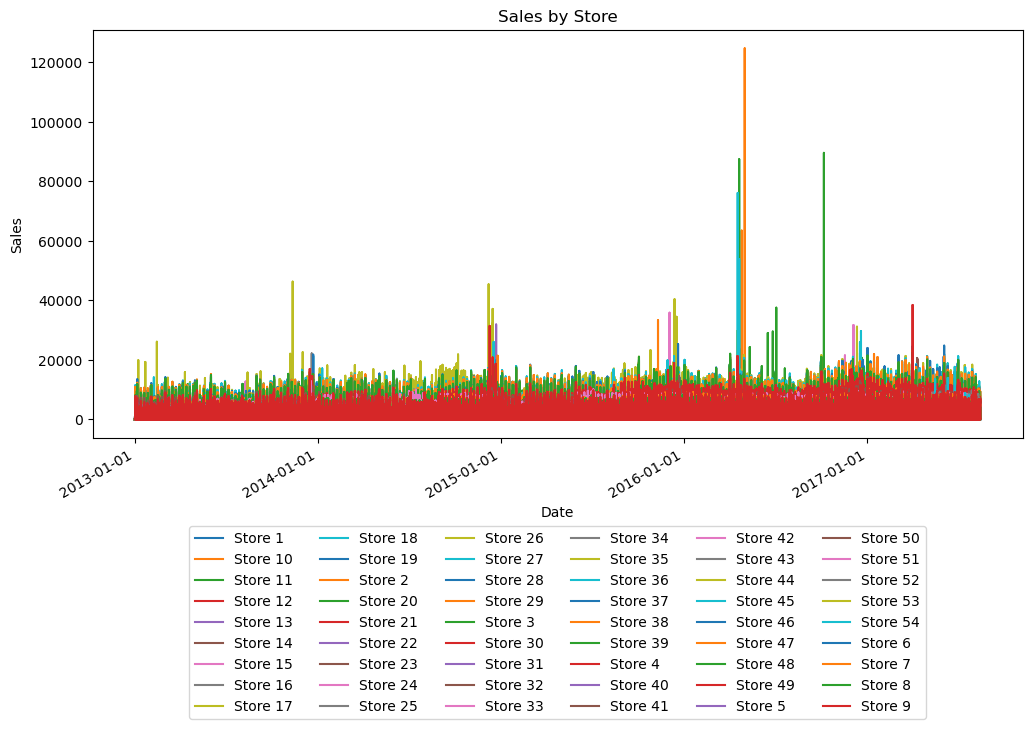

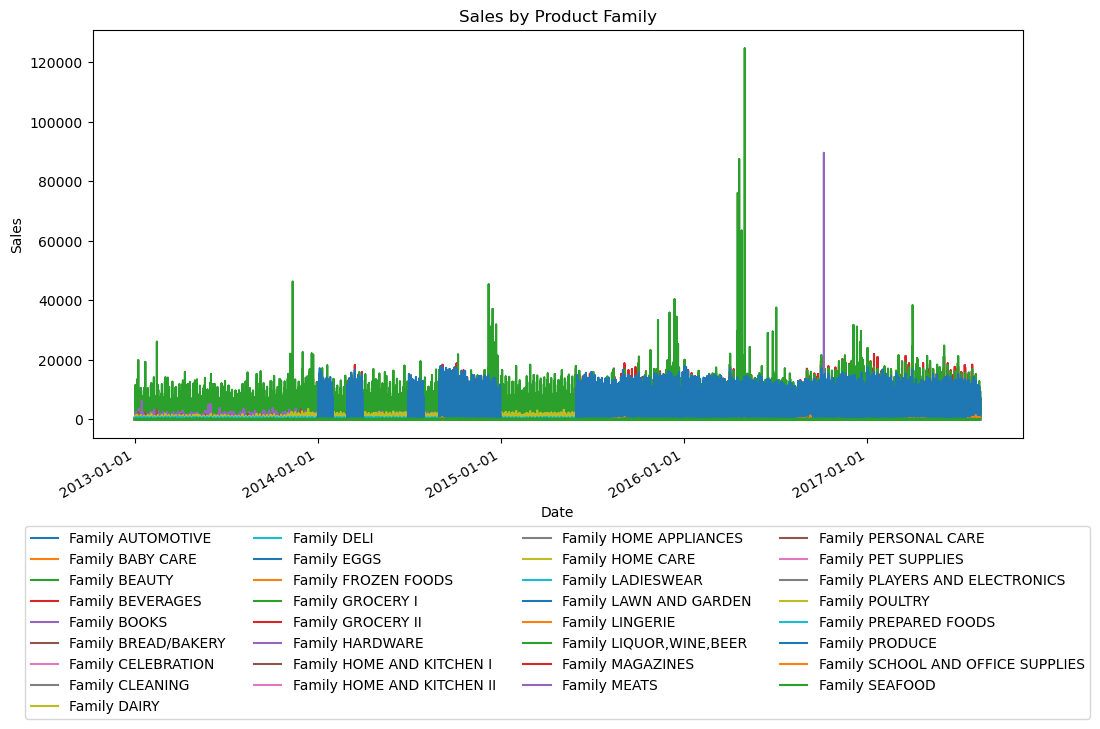

In [18]:
import matplotlib.dates as mdates

# Convert the 'date' column to datetime format
train['date'] = pd.to_datetime(train['date'])

# Explore unique values and counts of 'store_nbr' and 'family' columns
unique_stores = train['store_nbr'].unique()
unique_families = train['family'].unique()

print("Unique Store Numbers:", unique_stores)
print("Unique Product Families:", unique_families)

# Plot sales by store
plt.figure(figsize=(12, 6))
for store in unique_stores:
    store_data = train[train['store_nbr'] == store]
    plt.plot(store_data['date'], store_data['sales'], label=f'Store {store}')
plt.title('Sales by Store')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=6)
plt.show()

# Plot sales by product family
plt.figure(figsize=(12, 6))
for family in unique_families:
    family_data = train[train['family'] == family]
    plt.plot(family_data['date'], family_data['sales'], label=f'Family {family}')
plt.title('Sales by Product Family')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()

### for store in unique_stores: This line starts a loop that iterates over each unique store number in the unique_stores array. The loop variable store will take on the value of each unique store number in each iteration.

### store_data = data[data['store_nbr'] == store]: In this line, the code filters the original dataset data to extract rows where the value in the 'store_nbr' column matches the current value of the loop variable store. This creates a new DataFrame called store_data containing only the data for the specific store currently being iterated over.

### plt.plot(store_data.index, store_data['sales'], label=f'store{store}'): This line uses Matplotlib's plt.plot() function to create a line plot. The store_data.index represents the x-axis values (in this case, the dates from the index of store_data), and store_data['sales'] represents the y-axis values (the sales data for the current store). The label parameter is used to provide a label for the line on the plot, indicating the store n

# Impact of Promotions on Sales

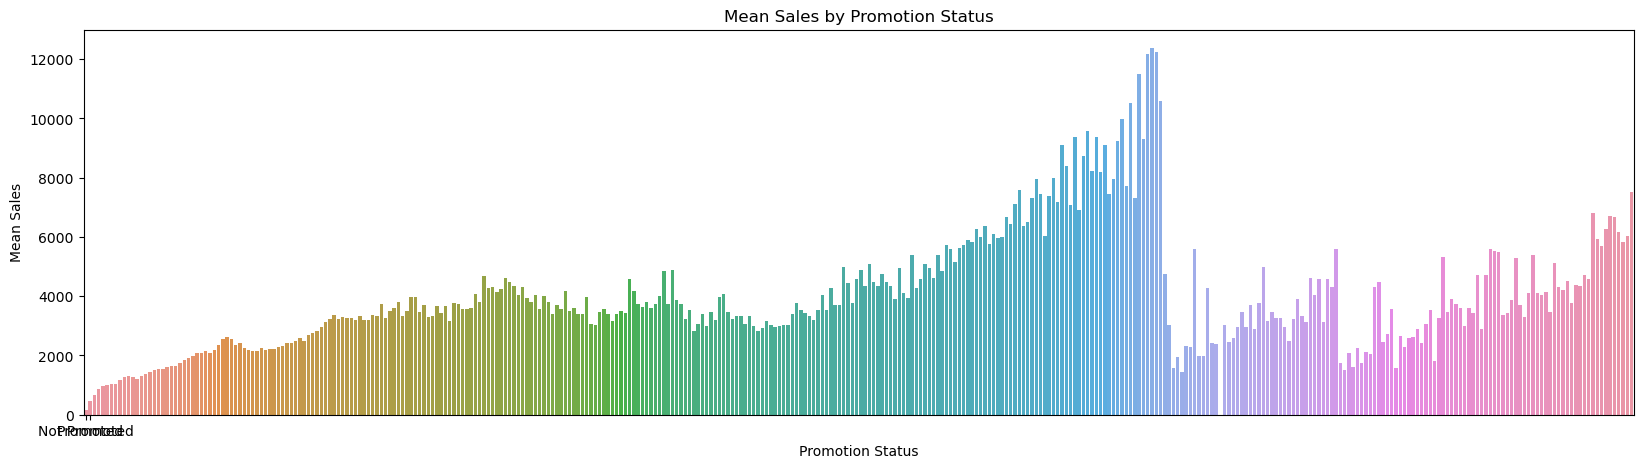

In [19]:
# Calculate mean sales for promoted and non-promoted products
mean_sales = train.groupby('onpromotion')['sales'].mean()

# Plot the mean sales
plt.figure(figsize=(20, 5))
sns.barplot(x=mean_sales.index, y=mean_sales.values)
plt.title('Mean Sales by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Mean Sales')
plt.gca().set_xticks([0, 1])
plt.gca().set_xticklabels(['Not Promoted', 'Promoted'])
plt.show()

# Correlation Analysis

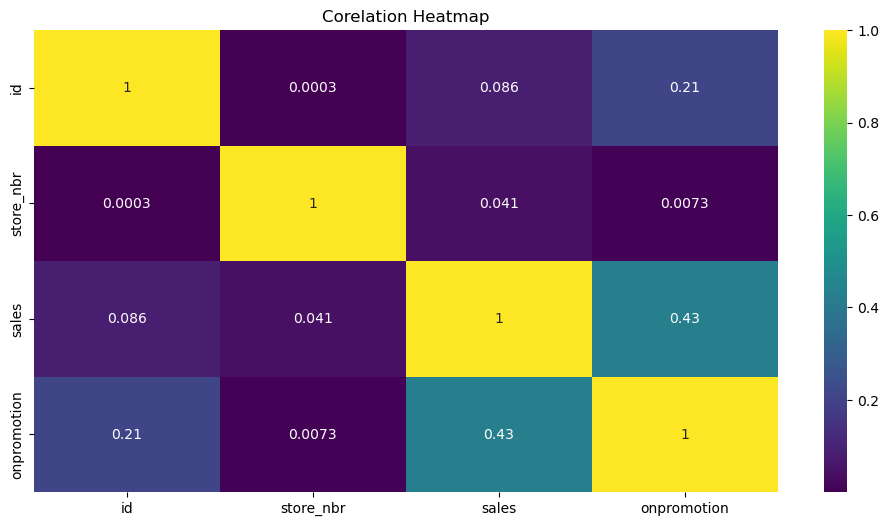

Correlations with 'sales':
sales          1.000000
onpromotion    0.427923
id             0.085784
store_nbr      0.041196
Name: sales, dtype: float64


In [20]:
corr_matrix=train.corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=corr_matrix,annot=True,cmap='viridis')
plt.title('Corelation Heatmap')
plt.show()

#Explore Corelation With Sales
sales_corr = corr_matrix['sales'].sort_values(ascending=False)
print("Correlations with 'sales':")
print(sales_corr)

**Correlation Coefficient**: The correlation coefficient quantifies the strength and direction of the linear relationship between two variables. It ranges from -1 to 1. A positive value indicates a positive correlation (as one variable increases, the other tends to increase), while a negative value indicates a negative correlation (as one variable increases, the other tends to decrease).

**Heatmap Visualization**: A heatmap is a color-coded matrix where each cell represents the correlation coefficient between two variables. The color intensity or shade indicates the strength of the correlation. Darker shades typically represent stronger correlations, while lighter shades indicate weaker or no correlation.

# Box Plot Visualization

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


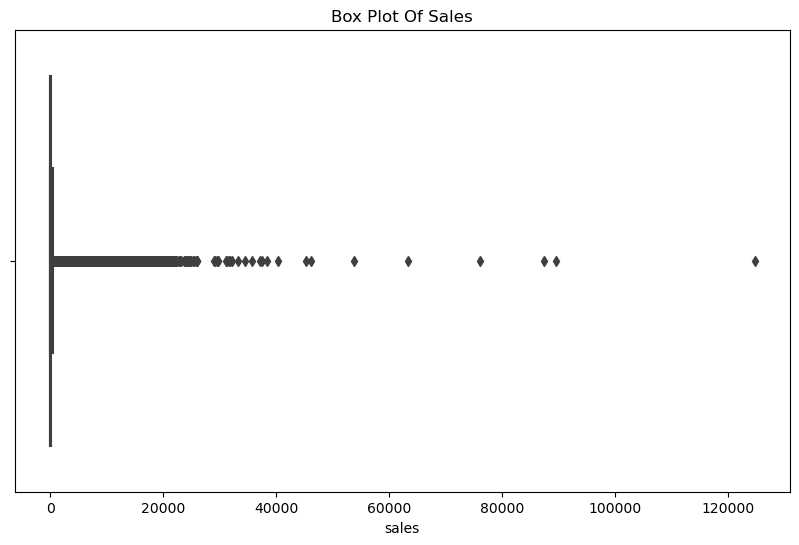

In [21]:
#identification of outliers by using boxplot and z-score
plt.figure(figsize=(10,6))
sns.boxplot(train['sales'])
plt.title('Box Plot Of Sales')
plt.show()

z_scores=(train['sales']-train['sales'].mean())/train['sales'].std()
outliers=train[abs(z_scores)>3]

# By Using Pivot Table March April and May Sales of Product Family
## 1. MARCH

In [22]:
train['date'] = pd.to_datetime(train['date'])
march= pd.pivot_table(train[(train.date.dt.month.isin([3]))], 
               index=train.date.dt.year, columns="family", 
               values="sales", aggfunc="mean")
march

family  AUTOMOTIVE  BABY CARE    BEAUTY    BEVERAGES     BOOKS  BREAD/BAKERY  \
date                                                                           
2013      4.560932   0.000000  2.330346  1088.542413  0.000000    354.853526   
2014      6.042413   0.043011  3.086022  2646.471924  0.000000    388.987692   
2015      6.902031   0.000000  2.538232  1385.922342  0.000000    500.669417   
2016      7.203106   0.264038  4.261051  2967.511947  0.000000    492.651516   
2017      7.642772   0.264038  4.212067  3664.010155  0.281959    573.421241   

family  CELEBRATION     CLEANING       DAIRY        DELI  ...  MAGAZINES  \
date                                                      ...              
2013       0.000000   899.277180  365.894863  195.494296  ...   0.000000   
2014      12.830346  1057.511350  709.575269  227.415349  ...   1.170251   
2015       0.000000  1115.107527  737.664875  301.454903  ...   0.000000   
2016      13.970131  1057.762843  843.405018  272.667234  ...   5.959976   
2017      13.947431  1197.510753  972.788530  320.441513  ...   6.161888   

family       MEATS  PERSONAL CARE  PET SUPPLIES  PLAYERS AND ELECTRONICS  \
date                                                                       
2013    313.938676     190.713262      0.000000                 0.000000   
2014    332.993349     231.297491      4.785544                 9.594385   
2015    326.473811     289.569892      0.000000                 0.000000   
2016    324.644176     290.982676      5.780765                 8.557945   
2017    367.350973     325.296894      8.627838                11.180406   

family     POULTRY  PREPARED FOODS      PRODUCE  SCHOOL AND OFFICE SUPPLIES  \
date                                                                          
2013    190.441733       90.362182     2.411589                    0.000000   
2014    390.943043       97.848576  2002.596327                    1.335125   
2015    384.931138       95.655186     4.124851                    0.000000   
2016    368.022836      107.821004  2262.134630                    1.922342   
2017    388.023902      111.916694  2396.963142                    4.925926   

family    SEAFOOD  
date               
2013    23.941057  
2014    23.890751  
2015    26.169936  
2016    23.449707  
2017    25.063907  

[5 rows x 33 columns]

In [23]:
march=march.sum(axis=1).reset_index()
march['month']='march'

In [24]:
### 2. APRIL

In [25]:
april= pd.pivot_table(train[(train.date.dt.month.isin([4]))], 
               index=train.date.dt.year, columns="family", 
               values="sales", aggfunc="mean")
april

family  AUTOMOTIVE  BABY CARE    BEAUTY    BEVERAGES     BOOKS  BREAD/BAKERY  \
date                                                                           
2013      4.620370   0.000000  2.265432  1076.000617  0.000000    351.001987   
2014      5.201235   0.000000  2.394444  1304.398148  0.000000    353.837909   
2015      5.584568   0.000000  2.467901  1424.164815  0.000000    493.748901   
2016      7.179630   0.225309  5.119136  3515.125926  0.000000    527.641915   
2017      8.129012   0.183951  4.622840  3660.164815  0.159259    541.994005   

family  CELEBRATION     CLEANING       DAIRY        DELI  ...  MAGAZINES  \
date                                                      ...              
2013       0.000000   877.300000  345.425926  195.162783  ...   0.000000   
2014       0.000000   896.440741  678.221605  215.213918  ...   0.000000   
2015       0.000000  1129.893210  729.123457  296.434968  ...   1.345679   
2016      14.203704  1224.717284  880.954321  293.728508  ...   6.930247   
2017      13.957407  1246.548148  964.040123  320.071472  ...   7.022840   

family       MEATS  PERSONAL CARE  PET SUPPLIES  PLAYERS AND ELECTRONICS  \
date                                                                       
2013    321.711827     201.569753      0.000000                 0.000000   
2014    302.611760     225.521605      0.000000                 0.000000   
2015    322.410050     280.970988      0.000000                 0.000000   
2016    360.285461     383.485802      6.767284                11.470988   
2017    352.594988     338.188889      9.053086                12.250617   

family     POULTRY  PREPARED FOODS      PRODUCE  SCHOOL AND OFFICE SUPPLIES  \
date                                                                          
2013    188.420076       80.945479     3.893827                    0.000000   
2014    347.227843       92.550206     4.414815                    0.000000   
2015    372.965106       95.475383     4.421605                    0.000000   
2016    398.568723      108.636610  2235.387336                    5.524691   
2017    373.529996      100.449227  2319.168684                   17.709259   

family    SEAFOOD  
date               
2013    21.172472  
2014    19.701996  
2015    24.681155  
2016    24.292264  
2017    22.359186  

[5 rows x 33 columns]

In [26]:
april= april.sum(axis=1).reset_index()
april['month']= 'april'

### 3. MAY

In [27]:
may= pd.pivot_table(train[(train.date.dt.month.isin([5]))], 
               index=train.date.dt.year, columns="family", 
               values="sales", aggfunc="mean")
may

family  AUTOMOTIVE  BABY CARE    BEAUTY    BEVERAGES   BOOKS  BREAD/BAKERY  \
date                                                                         
2013      5.396655   0.000000  2.219833  1089.679211  0.0000    368.008156   
2014      4.823775   0.000000  2.163680  1243.594982  0.0000    371.376630   
2015      5.572879   0.000000  3.011947  2111.170848  0.0000    527.189014   
2016      7.072282   0.271804  4.456392  3105.347073  0.0000    555.272169   
2017      7.059737   0.166667  5.900239  3487.099761  0.0908    566.843280   

family  CELEBRATION     CLEANING       DAIRY        DELI  ...  MAGAZINES  \
date                                                      ...              
2013       0.000000   887.870370  355.828554  207.463181  ...   0.000000   
2014       0.000000   895.068100  658.005974  226.424023  ...   0.000000   
2015       0.000000  1143.790323  772.585424  314.021200  ...   1.768220   
2016      13.768817  1167.784349  908.533453  293.746375  ...   6.377539   
2017      13.338112  1352.649940  966.421147  322.572431  ...   6.640980   

family       MEATS  PERSONAL CARE  PET SUPPLIES  PLAYERS AND ELECTRONICS  \
date                                                                       
2013    327.053195     184.580048      0.000000                 0.000000   
2014    327.115551     238.545998      0.000000                 0.000000   
2015    353.459916     300.913381      0.111111                 0.000000   
2016    353.364833     330.847073      6.666667                 9.504779   
2017    367.788181     310.506571      8.976703                12.050777   

family     POULTRY  PREPARED FOODS      PRODUCE  SCHOOL AND OFFICE SUPPLIES  \
date                                                                          
2013    192.131831       85.046085     5.278375                    0.000000   
2014    358.785254       87.823661     5.432497                    0.000000   
2015    396.078818       94.243751     6.076464                    0.000000   
2016    385.590510      104.735601  2289.723186                    6.228793   
2017    392.489781       91.215556  2460.593033                    5.769415   

family    SEAFOOD  
date               
2013    22.376498  
2014    21.444462  
2015    25.392373  
2016    23.906000  
2017    23.695576  

[5 rows x 33 columns]

In [28]:
may= may.sum(axis=1).reset_index()
may['month']= 'may'

In [29]:
import plotly.graph_objects as go

aa = march.append(april).append(may).reset_index().drop(['index'], axis=1)

plot1 = go.Bar(x=aa.date, y=aa[0][aa.month=='march'],
               marker=dict(color='#B22222'),
               name='March')

plot2 = go.Bar(x=aa.date, y=aa[0][aa.month=='april'],
               marker=dict(color='#FF3030'),
               name='April')

plot3 = go.Bar(x=aa.date, y=aa[0][aa.month=='may'],
               marker=dict(color='#00C957'),
               name='May')

data1 = [plot1, plot2, plot3]
fig = go.Figure(data=data1)

fig.update_layout(title='Sales Comparison of Three Months', title_x=0.5, width=700, height=400)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15008\2599524954.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aa = march.append(april).append(may).reset_index().drop(['index'], axis=1)


- There is an increase in April's sales in 2016

- By comparing all the years groceries always made sales hig

### Top 10 Products

In [30]:
data_fa_sa=train.groupby('family').agg({'sales': "mean"}).reset_index().sort_values(by='sales',
                                                                                  ascending=False)[:10]
data_fa_sa['color'] = '#71c7ec'
data_fa_sa['color'][2:] = '#107dac'
trace= go.Bar(x=data_fa_sa['sales'], y=data_fa_sa['family'],
               marker=dict(color= data_fa_sa['color']),
               name='Family', orientation='h')

fig = go.Figure(data = trace)
fig.layout.update({'title': 'Top 10 Product Sales'})
fig.layout.update({'width':700,'height':400})
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending')
fig.update_xaxes(visible=False)
fig.update_layout(title_x=0.5)
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15008\368512498.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Product Family Monthly Sales

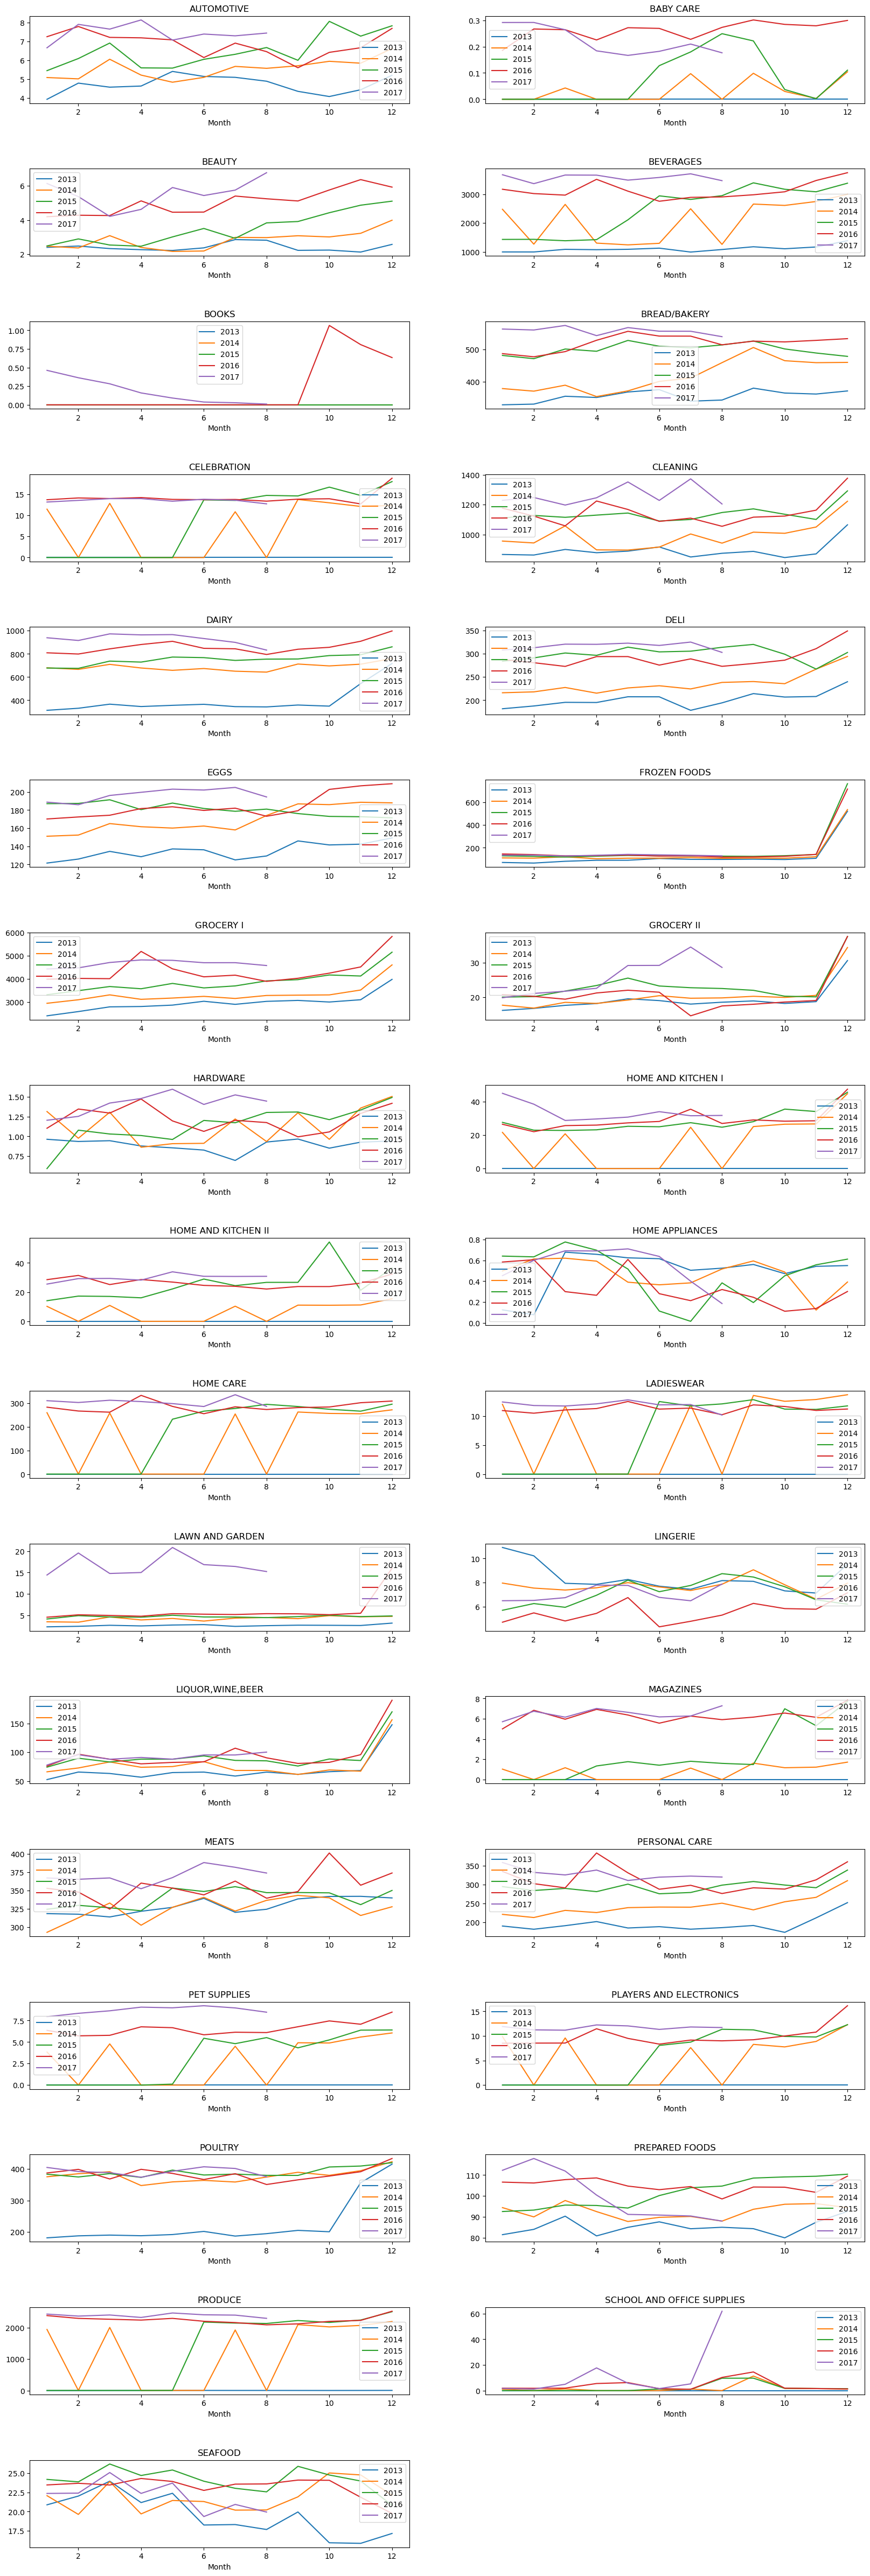

In [31]:
train['Year'] = train['date'].dt.year
train['Month'] = train['date'].dt.month
fig= plt.figure(figsize=(20,120))
fig.subplots_adjust(hspace=0.75)
for i,product in enumerate(train.family.unique()):
    ax = fig.add_subplot(33,2,i+1)
    select = train.query('family==@product')
    for year in [2013,2014,2015,2016,2017]: 
        select.query('Year==@year').groupby('Month').sales.mean().plot(ax=ax,label=year)
    plt.title(product)
    ax.legend();

# Data available in each year

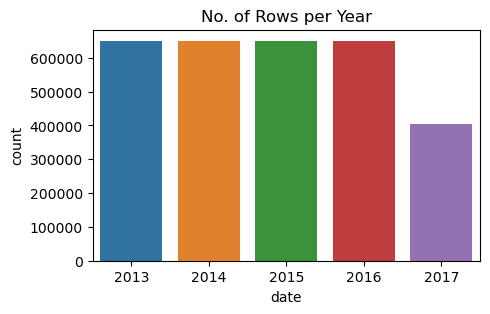

In [32]:
plt.figure(figsize=(5, 3))
sns.countplot(x=pd.to_datetime(train.date).dt.year)
plt.title('No. of Rows per Year')
plt.show();

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

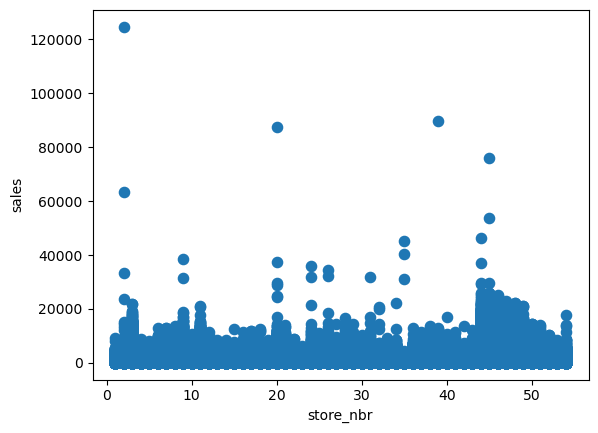

In [33]:
train.plot.scatter(x="store_nbr", y="sales", cmap="viridis", s=54)

# Data Preprocessing

In [34]:
df1=df.copy()

In [35]:
def create_date_features(df1):
    # Convert 'date' column to datetime type
    df1['date'] = pd.to_datetime(df1['date'])

    df1['WeekofYear'] = df1['date'].dt.isocalendar().week
    df1['Year'] = df1['date'].dt.year
    df1['Day'] = df1['date'].dt.day
    df1['Month'] = df1['date'].dt.month
    df1['day_of_month'] = df1['date'].dt.day
    df1['day_of_year'] = df1['date'].dt.dayofyear
    df1['day_of_week'] = df1['date'].dt.dayofweek

    df1['WeekofYear'] = df1['WeekofYear'].astype('uint8')
    df1['Month'] = df1['Month'].astype('uint8')
    df1['Year'] = df1['Year'].astype('uint16')
    df1['Day'] = df1['Day'].astype('uint8')
    df1['day_of_month'] = df1['day_of_month'].astype('uint16')
    df1['day_of_year'] = df1['day_of_year'].astype('uint16')
    df1['day_of_week'] = df1['day_of_week'].astype('uint16')
    return df1

In [36]:
df1 = create_date_features(df1)

# 1.  Label Encoding 

In [37]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [38]:
df1['family']= le.fit_transform(df1['family'])

In [39]:
df1.tail(5)

id       date  store_nbr  family     sales  onpromotion  \
3000883  3000883 2017-08-15          9      28   438.133            0   
3000884  3000884 2017-08-15          9      29   154.553            1   
3000885  3000885 2017-08-15          9      30  2419.729          148   
3000886  3000886 2017-08-15          9      31   121.000            8   
3000887  3000887 2017-08-15          9      32    16.000            0   

         WeekofYear  Year  Day  Month  day_of_month  day_of_year  day_of_week  
3000883          33  2017   15      8            15          227            1  
3000884          33  2017   15      8            15          227            1  
3000885          33  2017   15      8            15          227            1  
3000886          33  2017   15      8            15          227            1  
3000887          33  2017   15      8            15          227            1

# 2. One Hot Encoding 

In [40]:
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder()

In [41]:
df1=pd.get_dummies(df1,columns=['family'])

In [42]:
# df1

In [43]:
# Convert the 'date' column to datetime format
train['date'] = pd.to_datetime(train['date'])

# Set date as the index for time series analysis
train.set_index('date', inplace=True)
y = train['sales'].resample('MS').mean()

In [44]:
y['2013':][:15]

date
2013-01-01    186.952405
2013-02-01    193.581846
2013-03-01    206.880581
2013-04-01    205.639071
2013-05-01    209.943594
2013-06-01    218.655893
2013-07-01    203.783364
2013-08-01    212.479434
2013-09-01    220.593588
2013-10-01    213.164266
2013-11-01    231.136537
2013-12-01    295.606381
2014-01-01    342.341709
2014-02-01    241.268892
2014-03-01    368.661236
Freq: MS, Name: sales, dtype: float64

# Visualizing  Sales Time Series Data

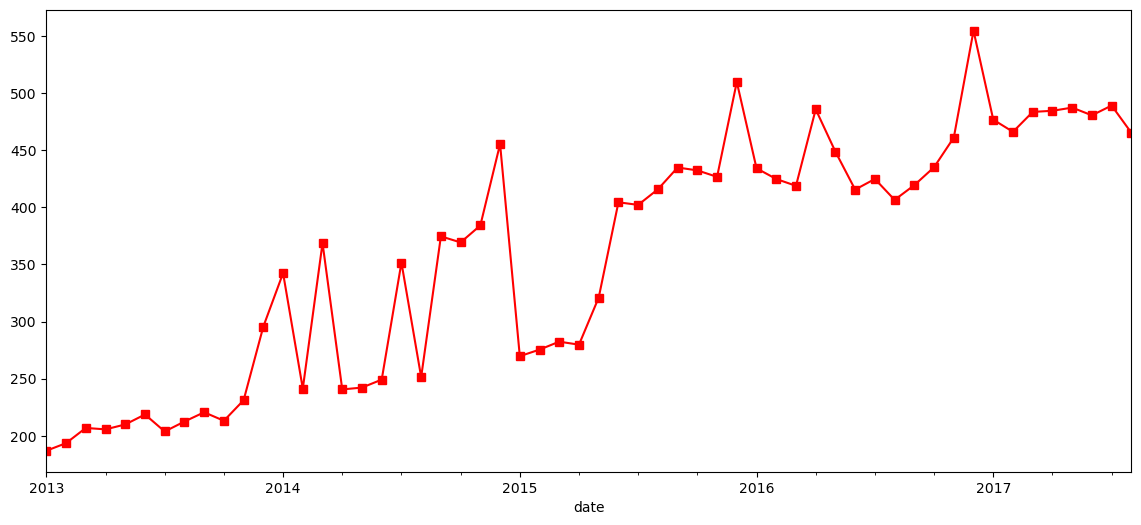

In [45]:
y.plot(figsize=(14,6), color='red', marker='s')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='sales'>

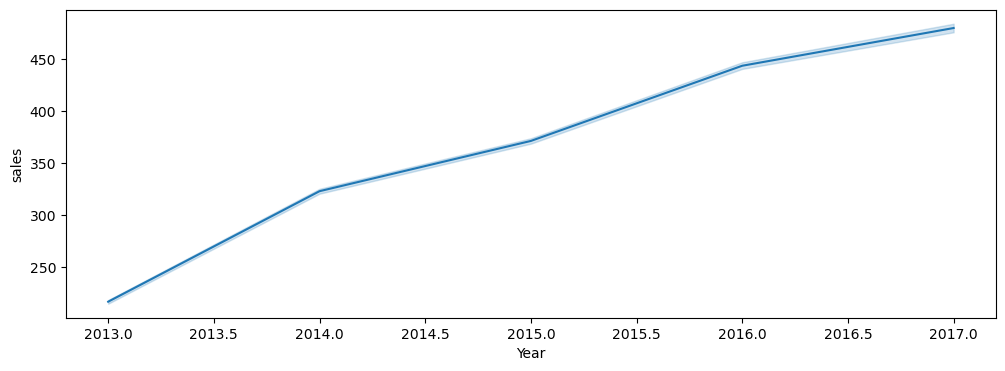

In [46]:
plt.figure(figsize=(12,4))
sns.lineplot(x="Year",y='sales',data=df1)

# Lag Plot

In [47]:
# # create a scatter plot
# for i in range(1,50,5):
#     lag_plot(df1.sales, lag=i)
#     plt.show()

# Seasonal Decomposition of Time Series
## 1. Additive

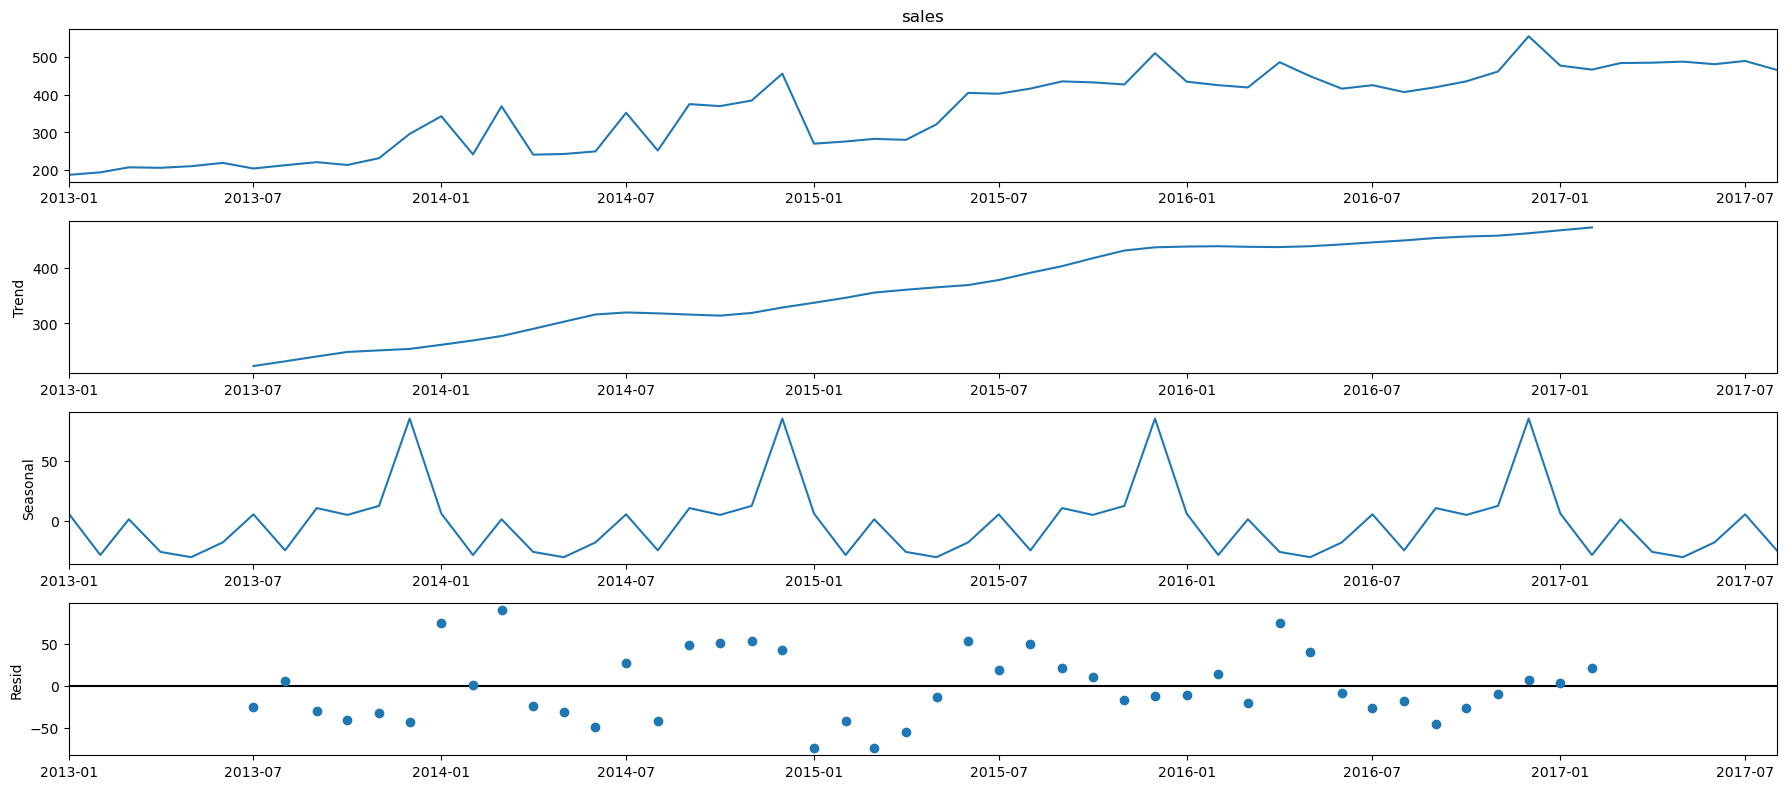

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

# ACF AND PACF PLOT
## Autocorrelation (ACF) Plot for Resampled Sales

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [50]:
# # # Convert the 'date' column to datetime format
# train['date'] = pd.to_datetime(train['date'])

# # # Set date as the index for time series analysis
# train.set_index('date', inplace=True)


# Resample the data to a daily frequency and aggregate sales
data_resampled = train.resample('D').sum()

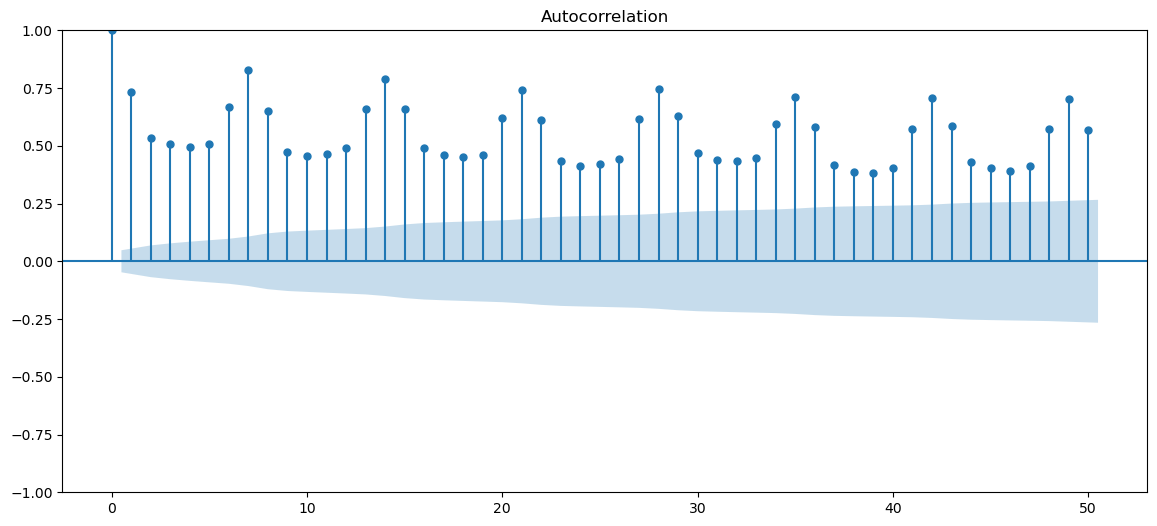

In [51]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(data_resampled['sales'],lags=50)
    plt.show()

## Partial Autocorrelation (PACF) Plot for Resampled Sales

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



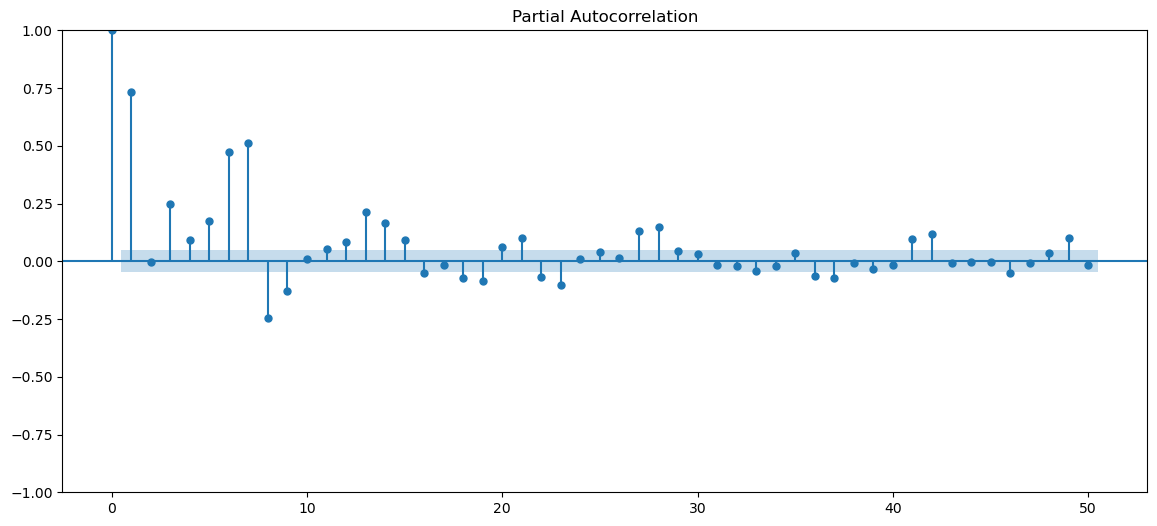

In [52]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_pacf(data_resampled['sales'],lags=50)
    plt.show()

# Time Series Decomposition
## 1. Seasonality
## 2. Trend

## Additive Seasonal Decomposition

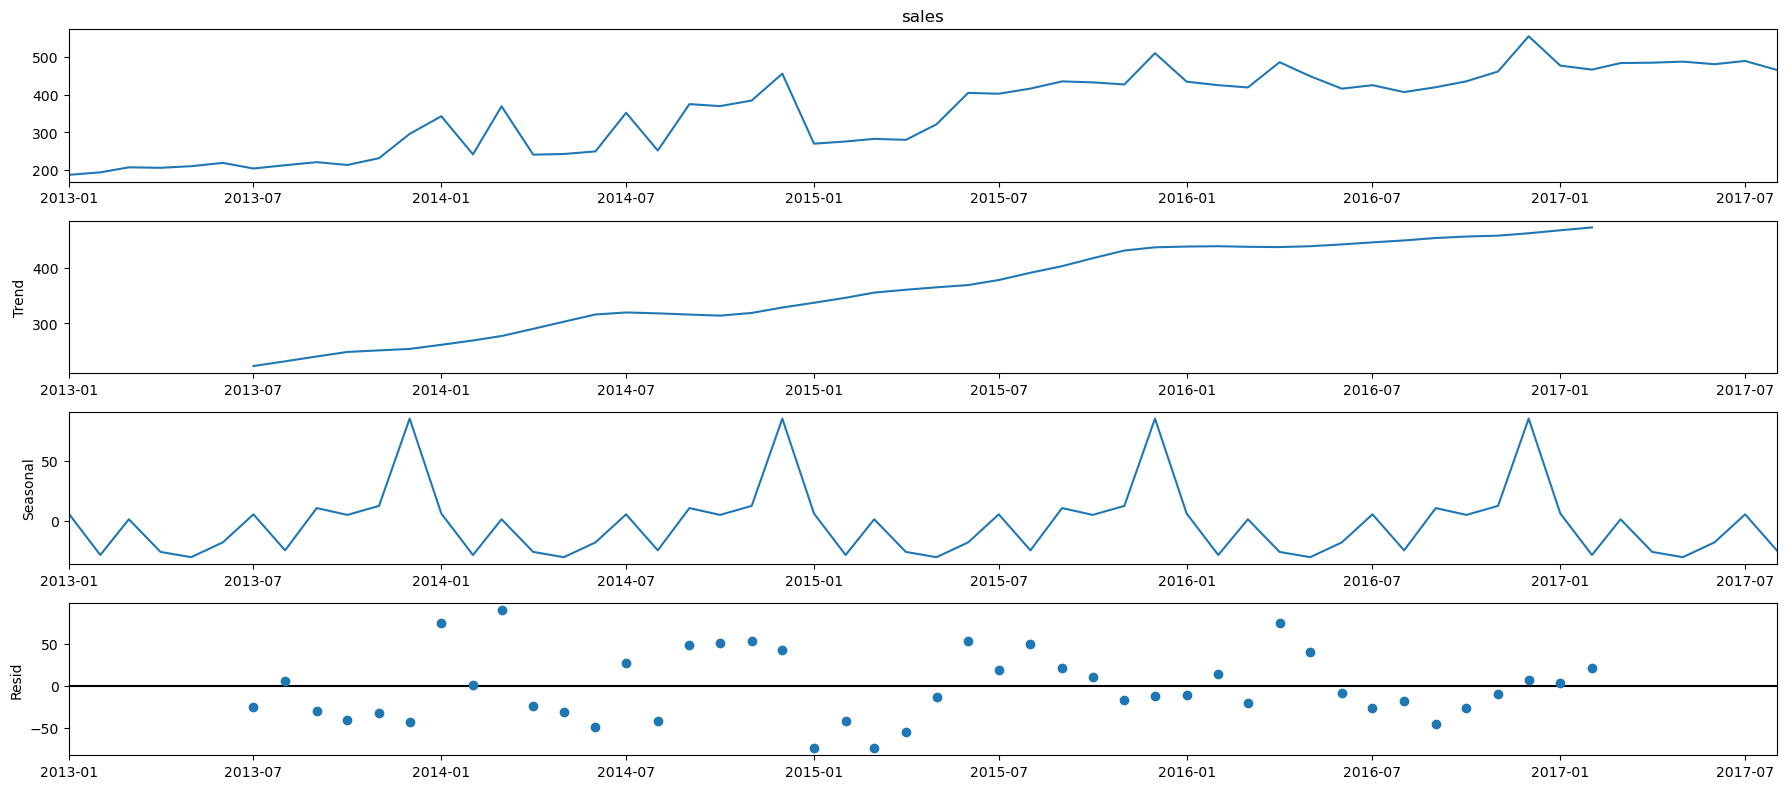

In [53]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Observation:-
1. **Observed** - Actual data
2. **Trend** - Increasing or decreasing trend.
3. **Seasonal** -
Varies from 0 to +50 with the mean 0.
Each cycle represents each year trend.
The value in the Y-axis has to be added to the Trend plot value to get the actual value of that year. E.g.:- For the year 2014 Jan, the seasonal value is +80 and the trend value is 100. Hence, teh actual value( product sales) will (seasonal+Trend) value = 80+100 = 180.
4. **Residual** - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

## Multiplicative Seasonal Decomposition

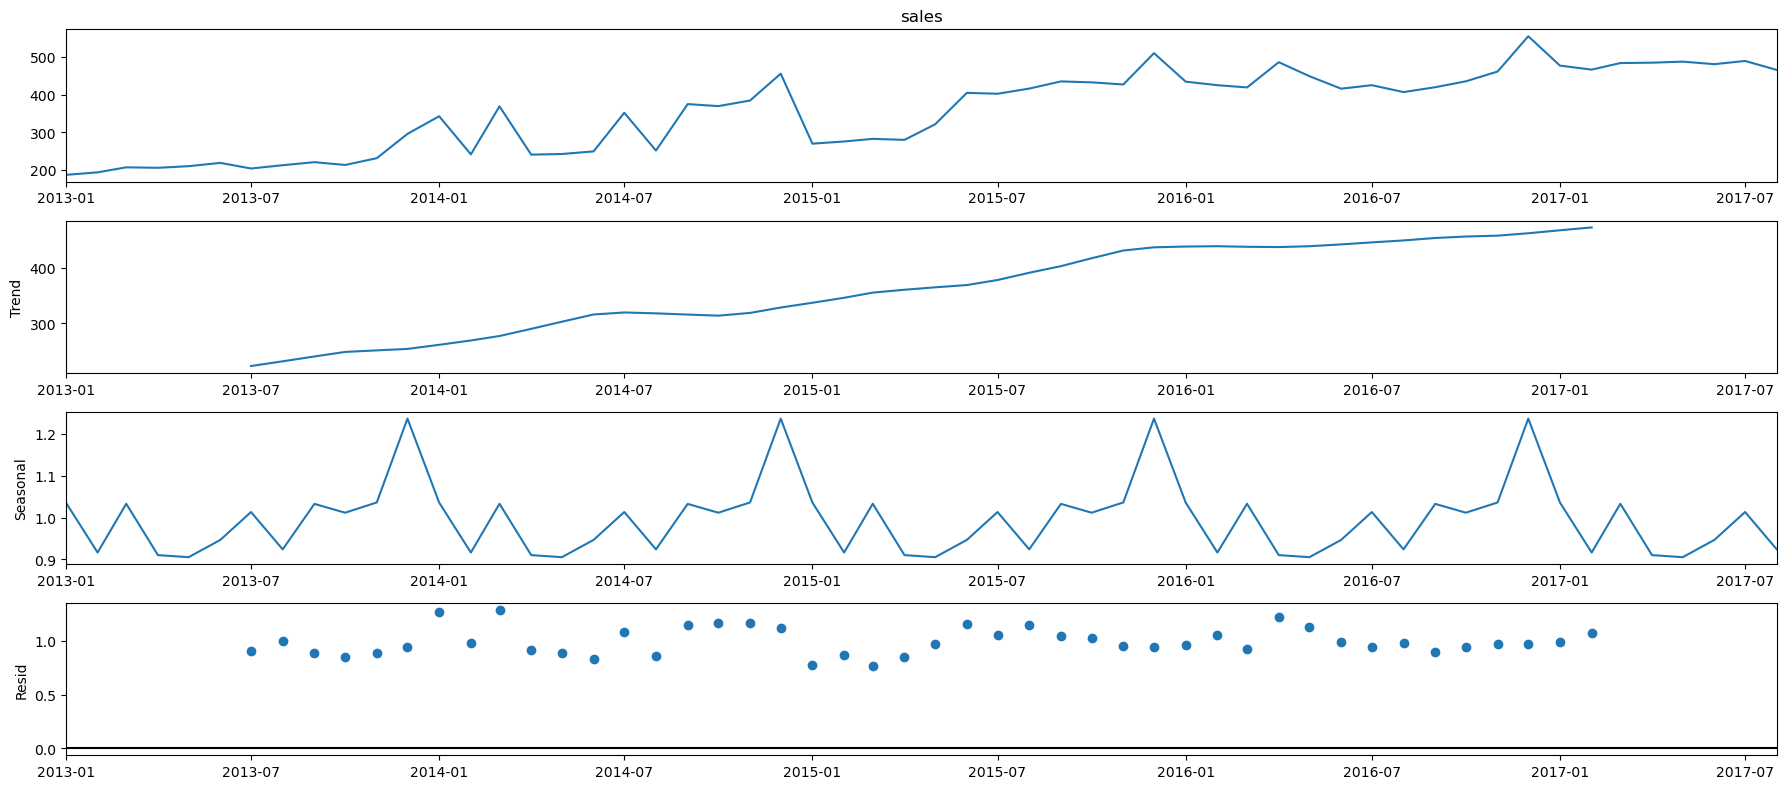

In [54]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

### Observation:-
**Seasonal** -
1. Varies from 0.8 to 1.2
2. The value in the Y-axis has to be multiplied to the Trend plot value to get the actual value of that year. E.g.:- For the year 2014 jan , the seasonal value is 1.2 and the trend value is 100. Hence, the actual value  sales will (seasonal X Trend) value = 1.2 X 100 = 120.

# Splitting Train and Test Data

In [55]:
df1.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'WeekofYear', 'Year',
       'Day', 'Month', 'day_of_month', 'day_of_year', 'day_of_week',
       'family_0', 'family_1', 'family_2', 'family_3', 'family_4', 'family_5',
       'family_6', 'family_7', 'family_8', 'family_9', 'family_10',
       'family_11', 'family_12', 'family_13', 'family_14', 'family_15',
       'family_16', 'family_17', 'family_18', 'family_19', 'family_20',
       'family_21', 'family_22', 'family_23', 'family_24', 'family_25',
       'family_26', 'family_27', 'family_28', 'family_29', 'family_30',
       'family_31', 'family_32'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df1, train_size=0.8, shuffle=False)


In [57]:
train.set_index('date', inplace=True)
test.set_index('date', inplace=True)

upsampled_train = train.resample('M').sum()  
upsampled_test = test.resample('M').sum()    

In [58]:
print(len(train))
print(len(test))

2400710
600178


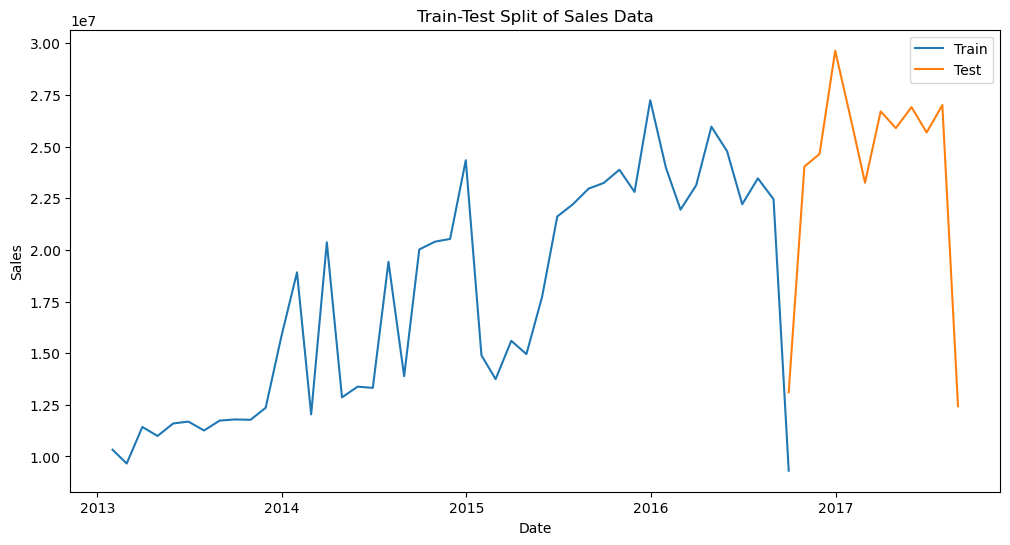

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(upsampled_train.index, upsampled_train['sales'], label='Train')
plt.plot(upsampled_test.index, upsampled_test['sales'], label='Test')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Train-Test Split of Sales Data')
plt.legend()
plt.show()


# Evaluation Metric MAPE

In [60]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

MAPE which stands for Mean Absolute Percentage Error. **This function calculates the mean absolute percentage error between two sets of values: pred (predicted values) and org (original or actual values)**.To calculate the  accuracy of a predictive model's forecasts or estimates we use Mean Absoulte Percentage Error.

# Exponential Methods
## Simple Exponential Method
### Using Forecast Attribute

In [61]:
# Fitting the Simple Exponential Smoothing model to upsampled training data
ses_model = SimpleExpSmoothing(upsampled_train['sales']).fit(optimized=True)

# Forecasting over upsampled test data
forecast_horizon = len(upsampled_test)  # Forecasting for the entire upsampled test period
test_pred_ses = ses_model.forecast(steps=forecast_horizon)
train_pred_ses = ses_model.fittedvalues

# Calculating evaluation metrics
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses, upsampled_test['sales']))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses, upsampled_train['sales']))
mape_ses = MAPE(test_pred_ses, upsampled_test['sales'])  

print('Simple Exponential Method Evaluation',"\n",
      'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",
      'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
      'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))


Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 37.90623548597639 
 Train Root Mean Squared Error = 3552048.58576612 
 Test Root Mean Squared Error  = 9529243.84509483


## Using Predict Attribute

In [62]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from math import sqrt

# Fitting the Simple Exponential Smoothing model to upsampled training data
ses_model = SimpleExpSmoothing(upsampled_train['sales']).fit(optimized=True)

# Forecasting over upsampled test data
test_pred_ses = ses_model.predict(start=upsampled_test.index[0], end=upsampled_test.index[-1])
train_pred_ses = ses_model.fittedvalues

# Calculating evaluation metrics
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses, upsampled_test['sales']))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses, upsampled_train['sales']))
mape_ses = MAPE(test_pred_ses, upsampled_test['sales'])  # Make sure MAPE is defined

print('Simple Exponential Method Evaluation',"\n",
      'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",
      'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
      'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))


Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 40.98668973991169 
 Train Root Mean Squared Error = 3552048.58576612 
 Test Root Mean Squared Error  = 9910917.46559981


## Difference between Predict and Forecast attribute

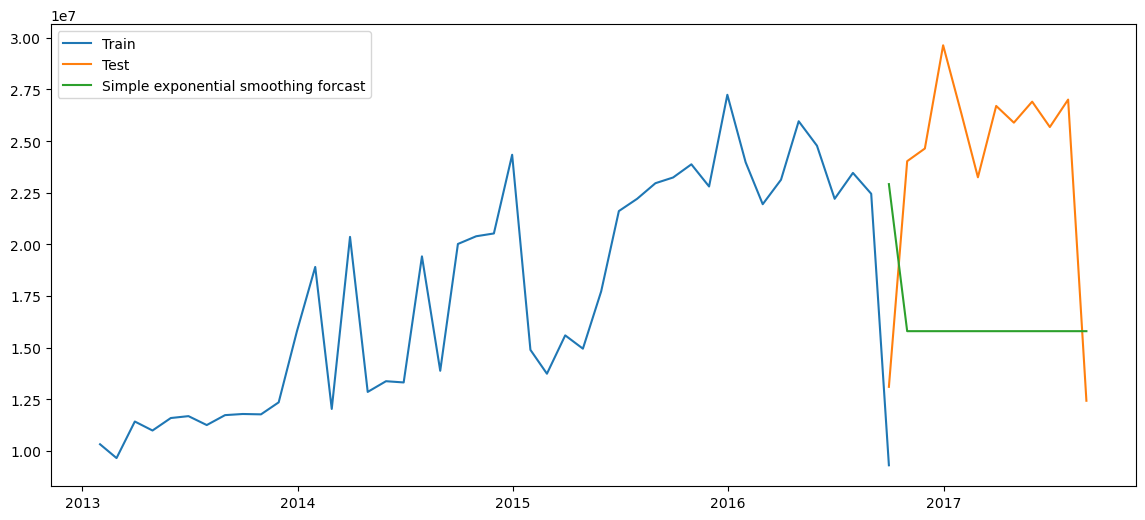

In [63]:
plt.figure(figsize=(14,6))
plt.plot(upsampled_train['sales'], label='Train')
plt.plot(upsampled_test['sales'], label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

### Observation
- .No seasonality captures.
- .Most recent observation gets higher weightages than the older ones for forecasting.

# Holt method (Double Exponential)
## Captures both Level and Trend .

In [64]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt

# Fitting the Double Exponential Smoothing model to upsampled training data
dexp_model = ExponentialSmoothing(upsampled_train['sales'], trend='add').fit(optimized=True)

# Forecasting over upsampled test data
forecast_horizon = len(upsampled_test)  # Forecasting for the entire upsampled test period
test_pred_dexp = dexp_model.forecast(steps=forecast_horizon)
train_pred_dexp = dexp_model.fittedvalues

# Calculating evaluation metrics
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp, upsampled_test['sales']))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp, upsampled_train['sales']))
mape_dexp = MAPE(test_pred_dexp, upsampled_test['sales'])  

print('Double Exponential Method Evaluation',"\n",
      'Mean Absolute Percent Error   = {}'.format(mape_dexp),"\n",
      'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
      'Test Root Mean Squared Error  = {}'.format(test_rmse_dexp))


Double Exponential Method Evaluation 
 Mean Absolute Percent Error   = 34.123055829133676 
 Train Root Mean Squared Error = 3543228.278006793 
 Test Root Mean Squared Error  = 8147748.373592639


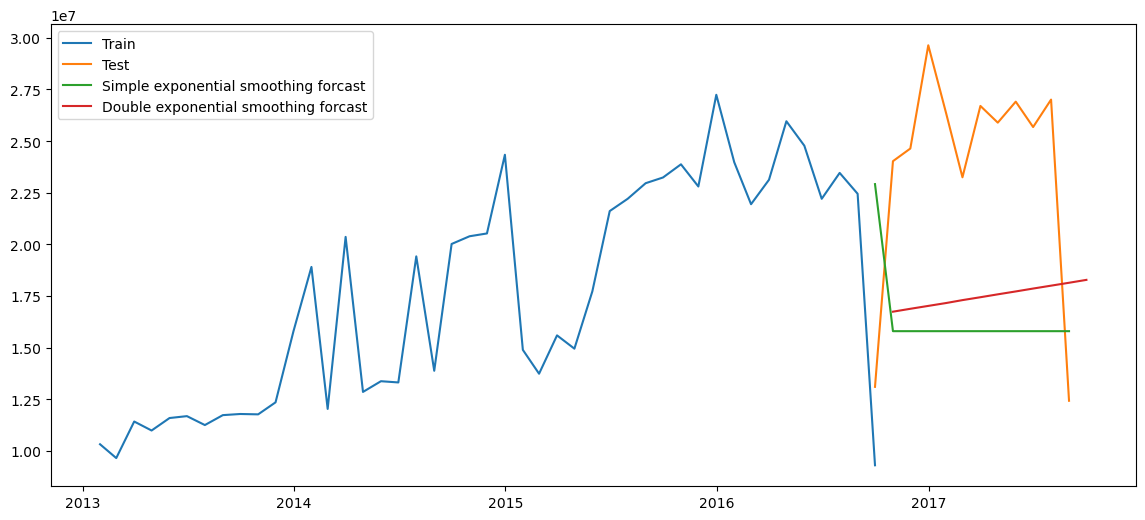

In [65]:
  plt.figure(figsize=(14,6))
plt.plot(upsampled_train['sales'], label='Train')
plt.plot(upsampled_test['sales'], label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

Observation
- We can see that we are able to capture the trend of the data but the level is on another level.
- We were not able to capture the seasonality.

# Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)
## Captures Level, Trend and Seasonality.

In [66]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt

# Fitting the Triple Exponential Smoothing (Holt-Winters) model to upsampled training data
holtwinter_model = ExponentialSmoothing(
    upsampled_train['sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=12  
).fit(optimized=True)

# Forecasting over upsampled test data
forecast_horizon = len(upsampled_test)  # Forecasting for the entire upsampled test period
test_pred_ad_texp = holtwinter_model.forecast(12)
test_pred_hw = holtwinter_model.forecast(steps=forecast_horizon)
train_pred_hw = holtwinter_model.fittedvalues

# Calculating evaluation metrics
test_rmse_hw = sqrt(mean_squared_error(test_pred_hw, upsampled_test['sales']))
train_rmse_hw = sqrt(mean_squared_error(train_pred_hw, upsampled_train['sales']))
mape_hw = MAPE(test_pred_hw, upsampled_test['sales'])  # Make sure MAPE is defined

print('Triple Exponential Smoothing (Holt-Winters) Method Evaluation',"\n",
      'Mean Absolute Percent Error   = {}'.format(mape_hw),"\n",
      'Train Root Mean Squared Error = {}'.format(train_rmse_hw),"\n",
      'Test Root Mean Squared Error  = {}'.format(test_rmse_hw))

Triple Exponential Smoothing (Holt-Winters) Method Evaluation 
 Mean Absolute Percent Error   = 32.89780742689274 
 Train Root Mean Squared Error = 3502994.090904511 
 Test Root Mean Squared Error  = 8368147.484104681


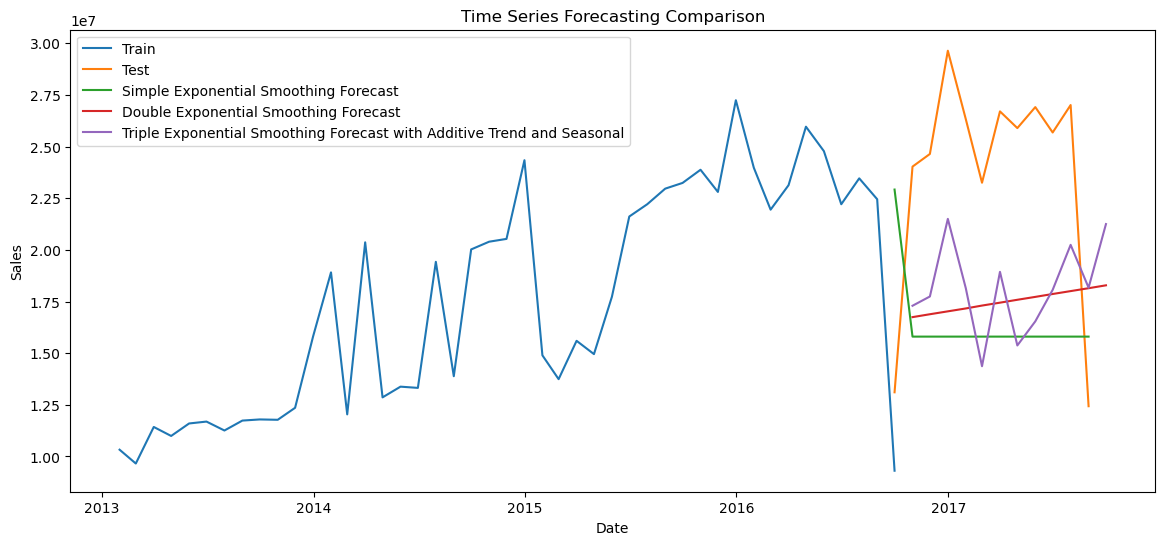

In [67]:
# Create a figure
plt.figure(figsize=(14,6))

# Plot the actual train and test data
plt.plot(upsampled_train['sales'], label='Train')
plt.plot(upsampled_test['sales'], label='Test')

# Plot the forecasts
plt.plot(test_pred_ses, label='Simple Exponential Smoothing Forecast')
plt.plot(test_pred_dexp, label='Double Exponential Smoothing Forecast')
plt.plot(test_pred_hw, label='Triple Exponential Smoothing Forecast with Additive Trend and Seasonal')

# Add legend and labels
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Time Series Forecasting Comparison')
plt.show()

## Observation
- It captures the trend, which we can see that the forecasted values are higher level than the test level.
- It also captures the seasonality.
- The peak of the forecasted value is higher than the actual.

# Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential)

In [68]:
texp_mul_ad_model  = ExponentialSmoothing(upsampled_train['sales'],seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(12)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,upsampled_test['sales']))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,upsampled_train['sales']))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,upsampled_test['sales'])
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error = 58602.257102843556 
 Train Root Mean Squared Error = 76549951088.51701 
 Test Root Mean Squared Error = 17812899969.749916


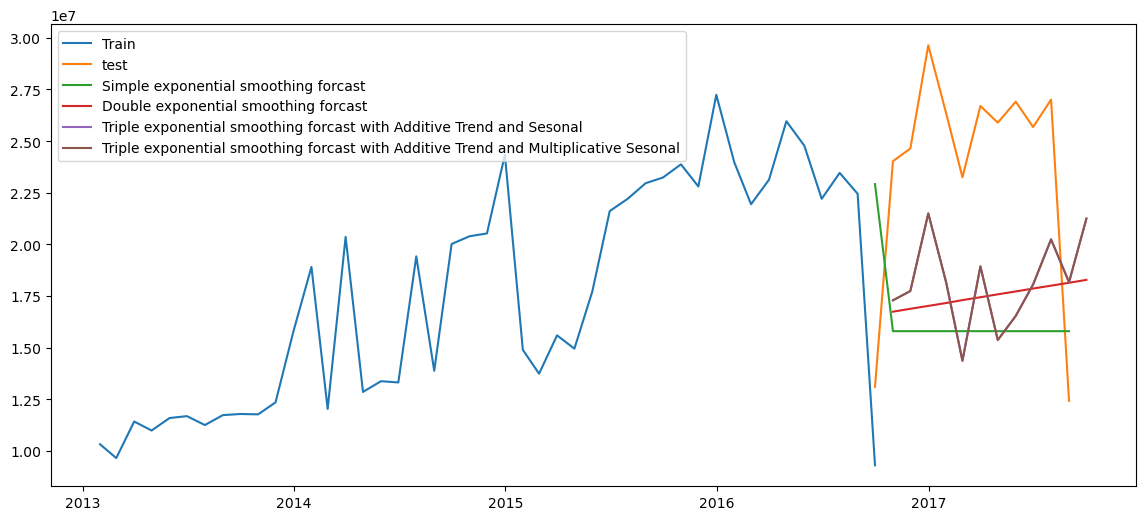

In [69]:
plt.figure(figsize=(14,6))
plt.plot(upsampled_train['sales'], label='Train')
plt.plot(upsampled_test['sales'], label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_hw, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

# Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)

In [70]:
texp_ad_mul_model  = ExponentialSmoothing(upsampled_train['sales'],seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(12)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,upsampled_test['sales']))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,upsampled_train['sales']))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,upsampled_test['sales'])
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 18.89929521513834 
 Train Root Mean Squared Error = 4006201.062886311 
 Test Root Mean Squared Error = 7158408.418853787


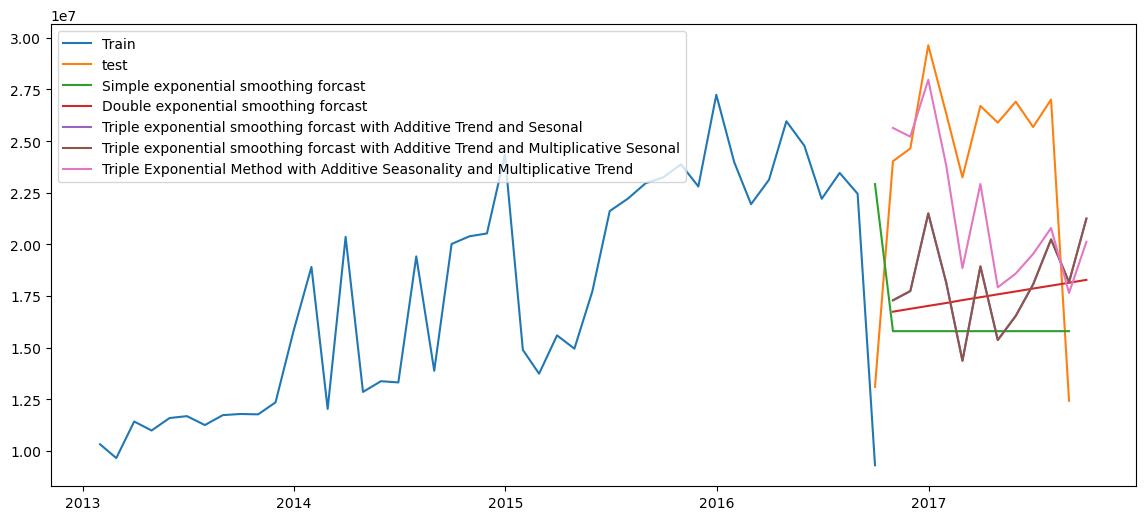

In [71]:
plt.figure(figsize=(14,6))
plt.plot(upsampled_train['sales'], label='Train')
plt.plot(upsampled_test['sales'], label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_hw, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

# Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [72]:
# upsampled_train['sales']
# upsampled_test['sales']

In [73]:
# texp_ad_mul_model  = ExponentialSmoothing(upsampled_train['sales'],seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_trend=0.5)
# test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(12)
# train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
# test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,upsampled_test['sales']))
# train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,upsampled_train['sales']))
# mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,upsampled_test['sales'])
# print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
#       'Mean Absolute Percent Error = {}'.format(mape_ad_mul_texp ),"\n",\
# 'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
# 'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_texp ))

In [74]:
texp_mul_model  = ExponentialSmoothing(upsampled_train['sales'],seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(12)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,upsampled_test['sales']))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,upsampled_train['sales']))
mape_mul_texp  = MAPE(test_pred_mul_texp,upsampled_test['sales'])
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error = 36.88980652975601 
 Train Root Mean Squared Error = 3827753.8781584934 
 Test Root Mean Squared Error = 9936662.718971198


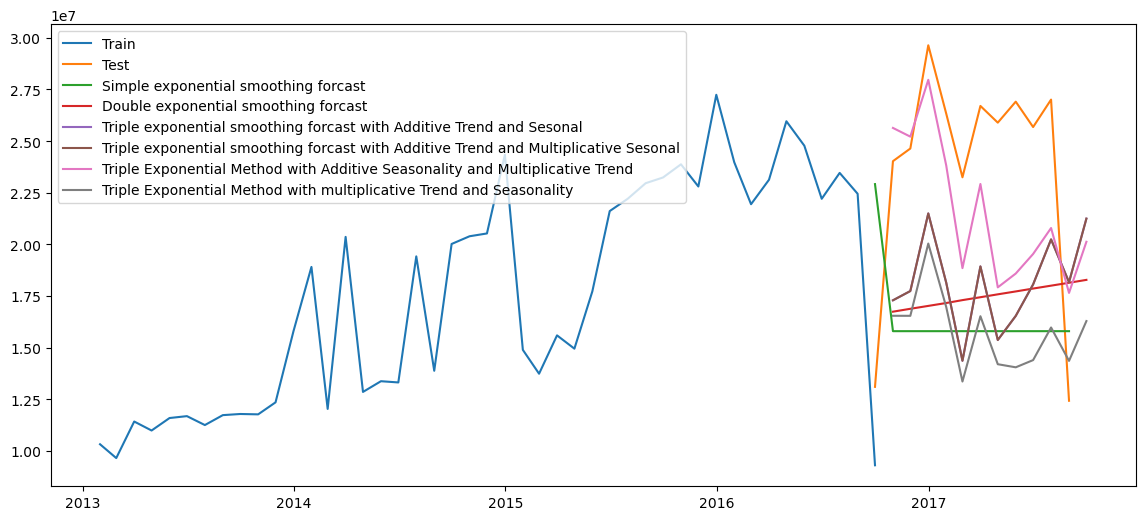

In [75]:
plt.figure(figsize=(14,6))
plt.plot(upsampled_train['sales'], label='Train')
plt.plot(upsampled_test['sales'], label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_hw, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

# Comparing the result

In [76]:
#Comparing the results 

Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul"\
                                  ,"Triple_Exp_mul"]),\
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_mul_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_ad_mul_texp]),\
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_hw,mape_ad_mul_texp,mape_ad_mul_texp,mape_ad_mul_texp]),\
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_hw,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_ad_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

Models    Train_RMSE  Test_MAPE(%)  Test_RMSE_Values
0  Triple_Exp_mul_ad  7.654995e+10     18.899295      1.781290e+10
1  Triple_Exp_ad_mul  4.006201e+06     18.899295      7.158408e+06
2     Triple_Exp_mul  4.006201e+06     18.899295      7.158408e+06
3      Triple_Exp_ad  7.654995e+10     32.897807      8.368147e+06
4         Double_Exp  3.543228e+06     34.123056      8.147748e+06
5         Simple_Exp  3.552049e+06     40.986690      9.910917e+06

# Time Series Using ARIMA

# Test of Stationarity

In [77]:
# # # Convert the 'date' column to datetime format
# train['date'] = pd.to_datetime(train['date'])

# # # Set date as the index for time series analysis
# train.set_index('date', inplace=True)

In [78]:
# data_resample

In [79]:
# data_resample=df1.resample('MS').mean()

In [80]:
def test_stationarity(datas):
    
    #Determine rolling statistics
    movingAverage = datas.rolling(window=12).mean()
    movingSTD = datas.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(datas, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(datas['sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

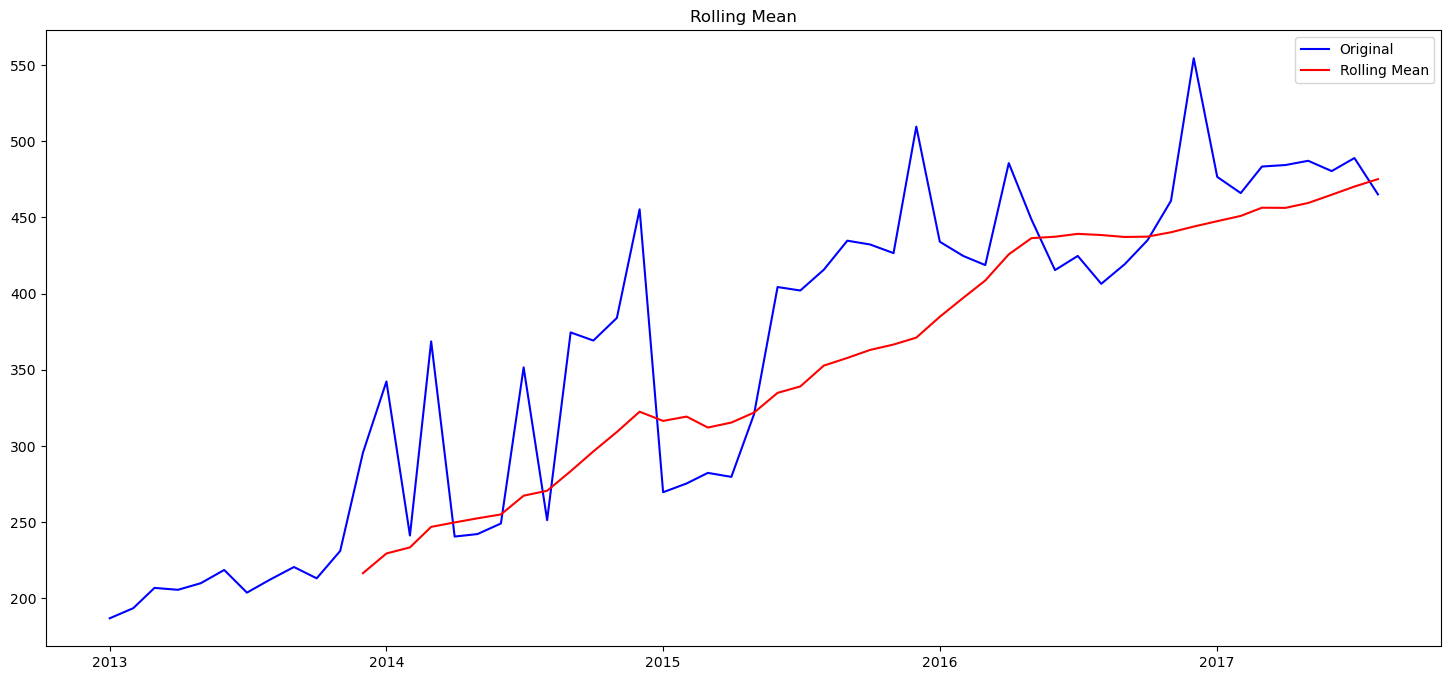

Results of Dickey Fuller Test:
Test Statistic                 -1.574664
p-value                         0.496307
#Lags Used                      1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [81]:
# # Convert the 'date' column to datetime format
df1['date'] = pd.to_datetime(df1['date'])

# # Set date as the index for time series analysis
df1.set_index('date', inplace=True)
sales= pd.DataFrame()
sales['sales'] = df1['sales'].resample('MS').mean()
test_stationarity(sales)

In [82]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [83]:
adf_test(sales.sales)

Fail to reject the null hypothesis
Data is non-stationary


# Feature Scaling (Transformations)
### Square Root Transformation

In [84]:
df1_resample=df1['sales'].resample('MS').mean()

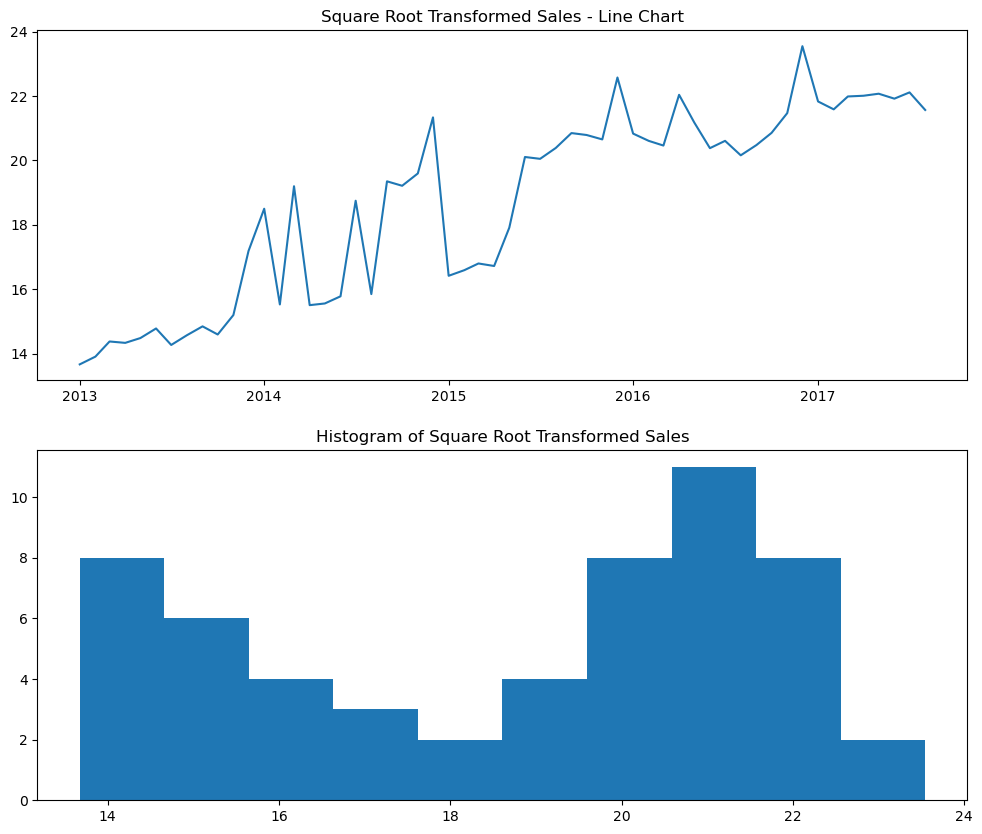

In [85]:
from statsmodels.tsa.stattools import adfuller

square_root = df1.resample('MS').mean()  # Resample and calculate Monthly start mean
square_root['sales'] = np.sqrt(square_root['sales'])  # Apply square root transformation

# Line chart
fig = plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.plot(square_root['sales'])
plt.title("Square Root Transformed Sales - Line Chart")

# Histogram
plt.subplot(212)
plt.hist(square_root['sales'])
plt.title("Histogram of Square Root Transformed Sales")
plt.show()

# Test stationarity
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(
        dftest[0:4],
        index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    )
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)



In [86]:
test_stationarity(square_root['sales'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.647957
p-value                         0.458106
#Lags Used                      1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [87]:
adf_test(square_root['sales'])

Fail to reject the null hypothesis
Data is non-stationary


# Log Transform

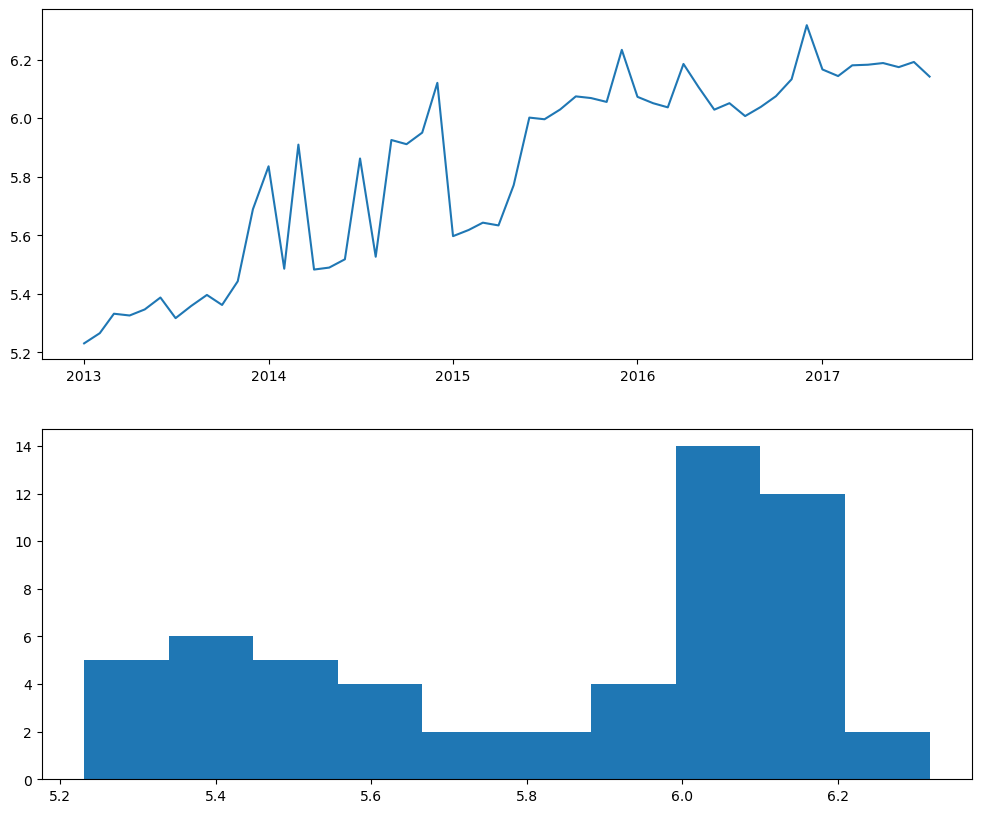

In [88]:
log = pd.DataFrame()
log = df1.resample('MS').mean()
log['sales'] = np.log(log['sales'])

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['sales'])
#Histogram
plt.subplot(212)
plt.hist(log['sales'])
plt.show()

In [89]:
test_stationarity(log['sales'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.748199
p-value                         0.406466
#Lags Used                      1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [90]:
adf_test(log['sales'])

Fail to reject the null hypothesis
Data is non-stationary


# Converting Non-Stationary Time Series into Stationary
### Box Cox Transformation

sales
date                
2013-01-01  5.230854
2013-02-01  5.265700
2013-03-01  5.332142
2013-04-01  5.326123
2013-05-01  5.346839

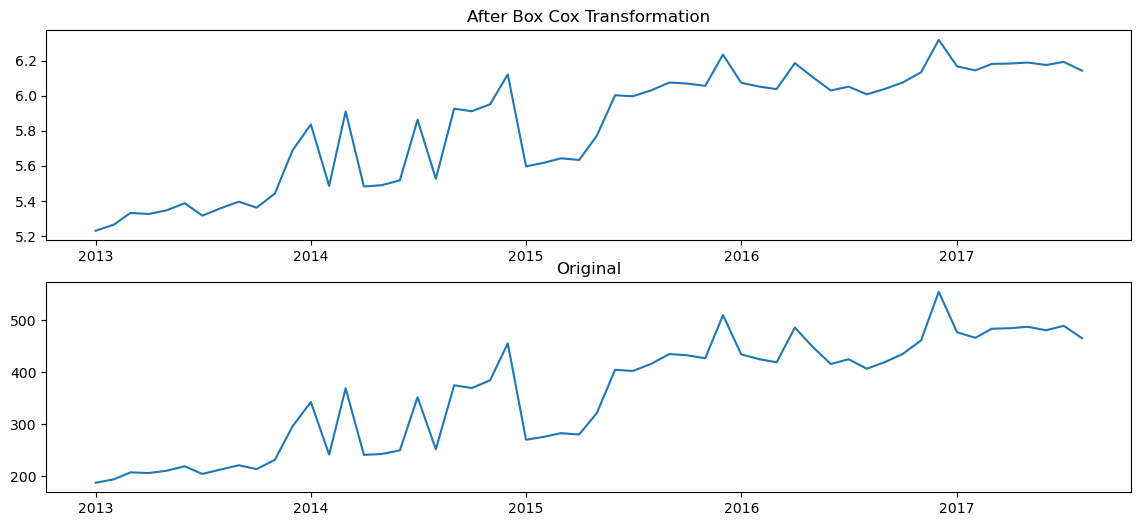

In [91]:
from scipy.stats import boxcox

resampled_data = df1.resample('MS').mean()

# Apply Box-Cox transformation
data_boxcox = pd.DataFrame()
data_boxcox['sales'] = pd.Series(boxcox(resampled_data['sales'], lmbda=0), index=resampled_data.index)

# Display the transformed data
display(data_boxcox.head())

# Create comparison plots
fig, axis = plt.subplots(2, figsize=(14, 6))
axis[0].plot(data_boxcox, label='Box-Cox Transformed')
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(resampled_data['sales'], label='Original')
axis[1].set_title('Original')
plt.show()

Observation
- We can see the variance became almost constant after the transformation. Both in the earlier and later years the variance is almost similar.
- But we can see that still the series has an upward trend. So, the mean is not constant yet. Hence, we need to do Differencing for making the mean constant.

In [92]:
test_stationarity(data_boxcox)

Results of Dickey-Fuller Test:
Test Statistic                 -1.748199
p-value                         0.406466
#Lags Used                      1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [93]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


## Differencing of the Box-Cox Transformation
- Differencing is performed by subtracting the previous observation from the current observation.

- Differencing removes trend and seasonality in a Time series. When an entire cycle is used for differencing the other cycle, then the seasonality is removed.

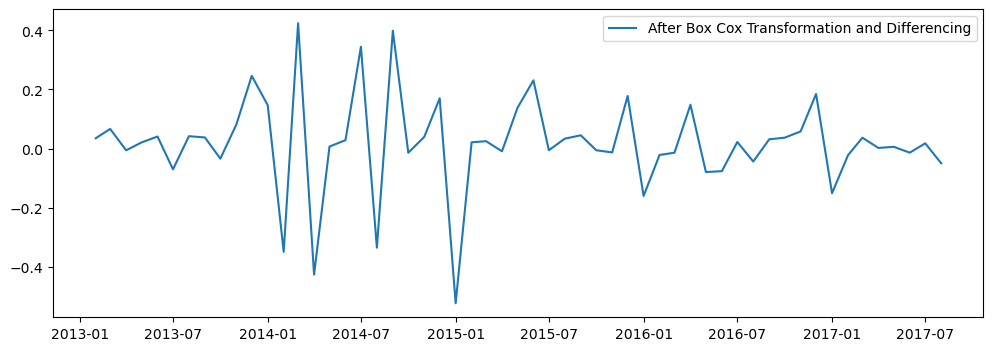

In [94]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

# Observation
- We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.
- It is a horizontal trend.
- The mean became constant. The mean is zero.
- Also, the variance is almost constant.

Lets test the Stationarity again.

In [95]:
#check this log transfered data with function
test_stationarity(data_boxcox_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -4.444704
p-value                         0.000247
#Lags Used                      7.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [96]:
adf_test(data_boxcox_diff)

Reject the null hypothesis
Data is stationary


##  Finally, Our Series is now stationary for AR Forecasting

# STATIONARY DATA NAME IS :- data_boxcox_diff

# *AFTER THIS I AM FACING PROBLEM IN PART OF FUTURE PREDICTION*

# ARIMA Hyperparameter Tuning
*order(p,d,q)*

- p = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series.

- d = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary.

- q = This variable denotes the lag of the error component, where error component is a part of the time series not explained by trend or seasonality.

In [97]:
# data_dff=data_boxcox_diff['sales']

In [98]:
!pip install pmdarima

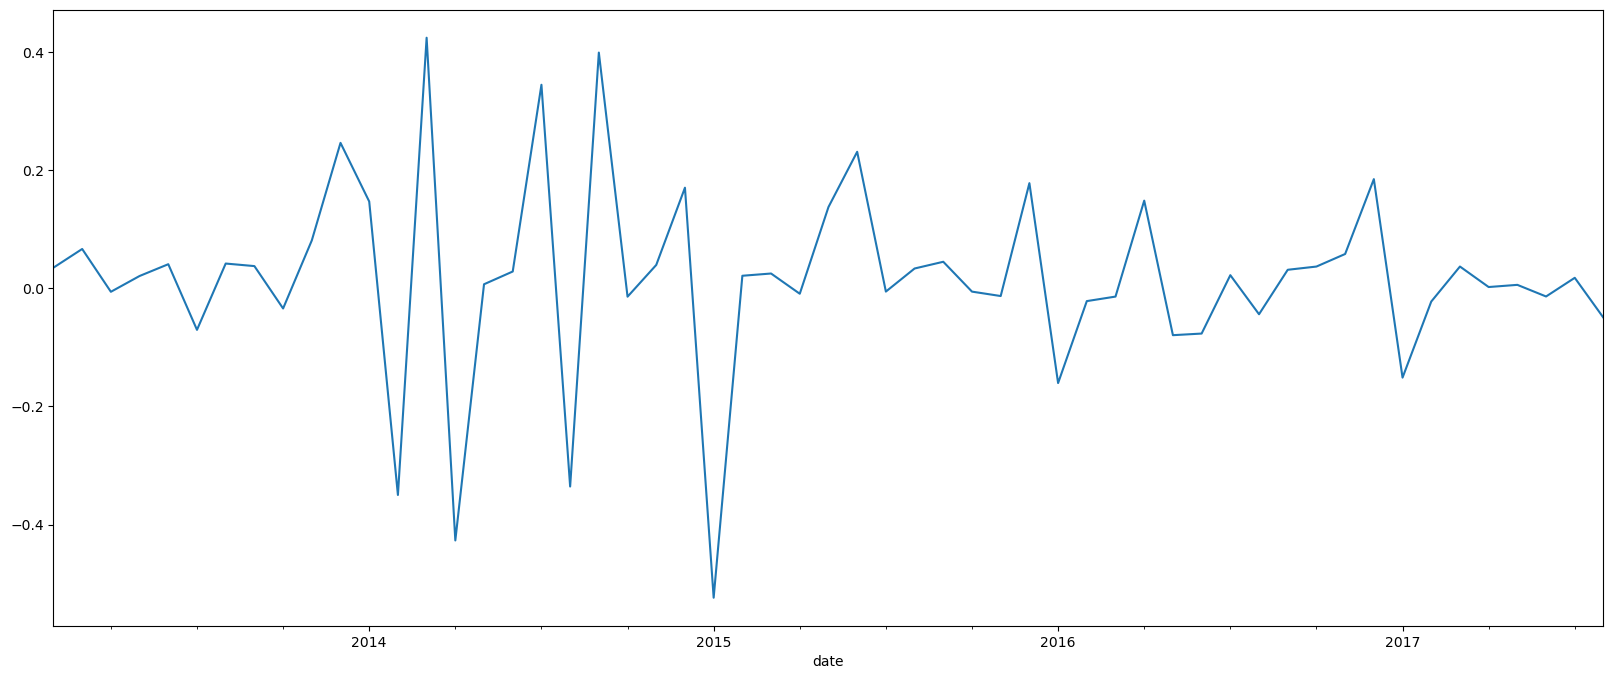

In [99]:
data_boxcox_diff['sales'].plot(figsize=(20,8))
plt.show()

In [100]:
from pmdarima import auto_arima

# Order of ARIMA Model

In [114]:
stepwise_fit= auto_arima(data_boxcox_diff['sales'],
                         trace=True,supress_warinings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-50.308, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-37.653, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-49.149, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-50.508, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-39.106, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-49.992, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-49.218, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 2.038 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   55
Model:               SARIMAX(0, 0, 1)   Log Likelihood                  28.254
Date:                Wed, 30 Aug 2023   AIC                            -50.508
Time:                        20:19:21   BIC                            -44.486
Sample:                    02-01-2013   HQIC                           -48.179
                         - 08-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0172      0.007      2.317      0.021       0.003       0.032
ma.L1         -0.6599      0.093     -7.058      0.000      -0.843      -0.477
sigma2         0.0207      0.004      4.714      0.000       0.012       0.029
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.53   Prob(JB):                         0.93
Heteroskedasticity (H):               0.25   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
from pmdarima import auto_arima

## Splitting Data into Training and Testing data set

# Train the Model

In [116]:
print(data_resampled.shape)
training=data_boxcox_diff.iloc[:-31]
testing=data_boxcox_diff.iloc[-31:]
print(training.shape,testing.shape)

(1688, 6)
(24, 1) (31, 1)


# Training Model

In [117]:
from statsmodels.tsa.arima.model import ARIMA

In [118]:
model_data=ARIMA(training['sales'],order=(0,0,1))
model_data=model_data.fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   24
Model:                 ARIMA(0, 0, 1)   Log Likelihood                   8.840
Date:                Wed, 30 Aug 2023   AIC                            -11.679
Time:                        20:19:38   BIC                             -8.145
Sample:                    02-01-2013   HQIC                           -10.742
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0280      0.004      7.147      0.000       0.020       0.036
ma.L1         -0.9996     37.188     -0.027      0.979     -73.888      71.888
sigma2         0.0245      0.912      0.027      0.979      -1.762       1.811
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.39   Prob(JB):                         0.72
Heteroskedasticity (H):              19.25   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make Prediction on Test DataSet

In [119]:
start = len(training)
end = len(training) + len(testing) - 1
predic = model_data.predict(start=start, end=end, typ='levels')
print(predic)

2015-02-01    0.329672
2015-03-01    0.027994
2015-04-01    0.027994
2015-05-01    0.027994
2015-06-01    0.027994
2015-07-01    0.027994
2015-08-01    0.027994
2015-09-01    0.027994
2015-10-01    0.027994
2015-11-01    0.027994
2015-12-01    0.027994
2016-01-01    0.027994
2016-02-01    0.027994
2016-03-01    0.027994
2016-04-01    0.027994
2016-05-01    0.027994
2016-06-01    0.027994
2016-07-01    0.027994
2016-08-01    0.027994
2016-09-01    0.027994
2016-10-01    0.027994
2016-11-01    0.027994
2016-12-01    0.027994
2017-01-01    0.027994
2017-02-01    0.027994
2017-03-01    0.027994
2017-04-01    0.027994
2017-05-01    0.027994
2017-06-01    0.027994
2017-07-01    0.027994
2017-08-01    0.027994
Freq: MS, Name: predicted_mean, dtype: float64


# Problem: -  It's Coming Straight Line 

<AxesSubplot:xlabel='date'>

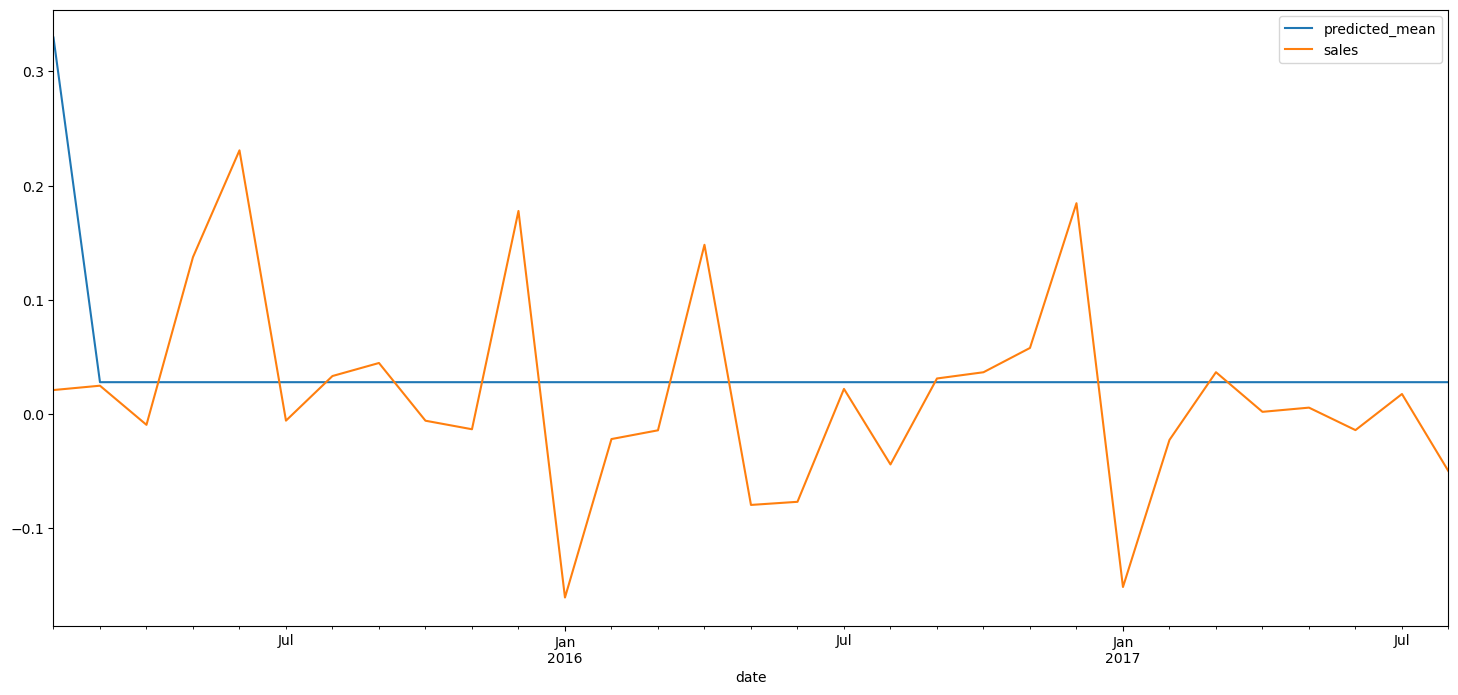

In [120]:
predic.plot(legend=True)
testing['sales'].plot(legend=True)

In [121]:
testing['sales'].mean()

0.017585889910710605

In [122]:
rmse=sqrt(mean_squared_error(predic,testing['sales']))
print(rmse)

0.10284418092212905


# Future Forecasting

In [123]:
model_fu=ARIMA(data_boxcox_diff['sales'],order=(0,1,2))
model_fu=model_fu.fit()
# df.tail()

# For future Prediction

In [124]:
import pandas as pd

# Generate date range for future predictions (365 days)
index_future_dates = pd.date_range(start='2017-08-15', periods=365)  # Adjust the start date as needed

# Make predictions using the ARIMA model
# Replace 'model_fu' with your ARIMA model
predic_1yr = model_fu.predict(start=len(data_boxcox_diff), end=len(data_boxcox_diff)+364, typ='levels').rename('ARIMA PREDICTION')

# Set the index of the predictions to the generated date range
predic_1yr.index = index_future_dates

print(predic_1yr)


2017-08-15    0.061580
2017-08-16    0.017001
2017-08-17    0.017001
2017-08-18    0.017001
2017-08-19    0.017001
                ...   
2018-08-10    0.017001
2018-08-11    0.017001
2018-08-12    0.017001
2018-08-13    0.017001
2018-08-14    0.017001
Freq: D, Name: ARIMA PREDICTION, Length: 365, dtype: float64


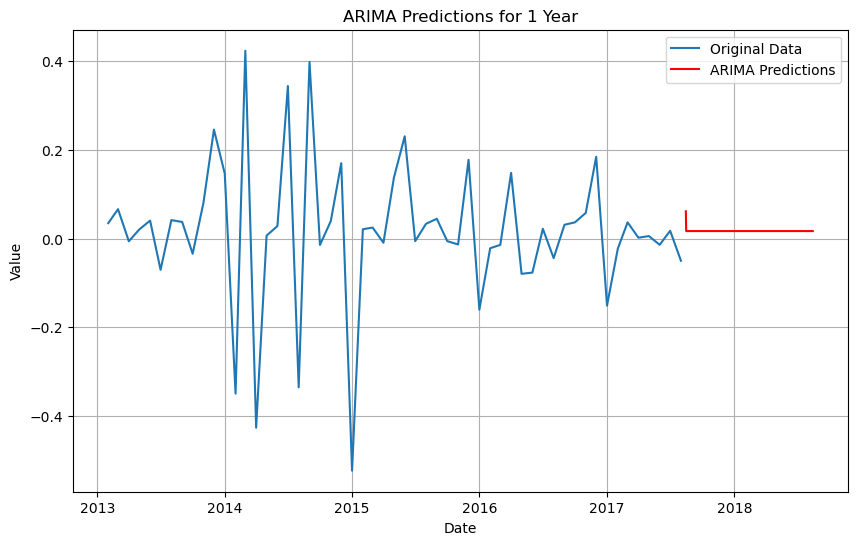

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate date range for future predictions (365 days)
index_future_dates = pd.date_range(start='2017-08-15', periods=365)  

# Make predictions using the ARIMA model
# Replace 'model_fu' with your ARIMA model
predic_1yr = model_fu.predict(start=len(data_boxcox_diff['sales']), end=len(data_boxcox_diff['sales'])+364, typ='levels').rename('ARIMA PREDICTION')

# Set the index of the predictions to the generated date range
predic_1yr.index = index_future_dates

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(data_boxcox_diff.index, data_boxcox_diff, label='Original Data')
plt.plot(predic_1yr.index, predic_1yr, label='ARIMA Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Predictions for 1 Year')
plt.legend()
plt.grid()
plt.show()


# Different Method

In [133]:
len(data_boxcox_diff)

55

<Figure size 1200x600 with 0 Axes>

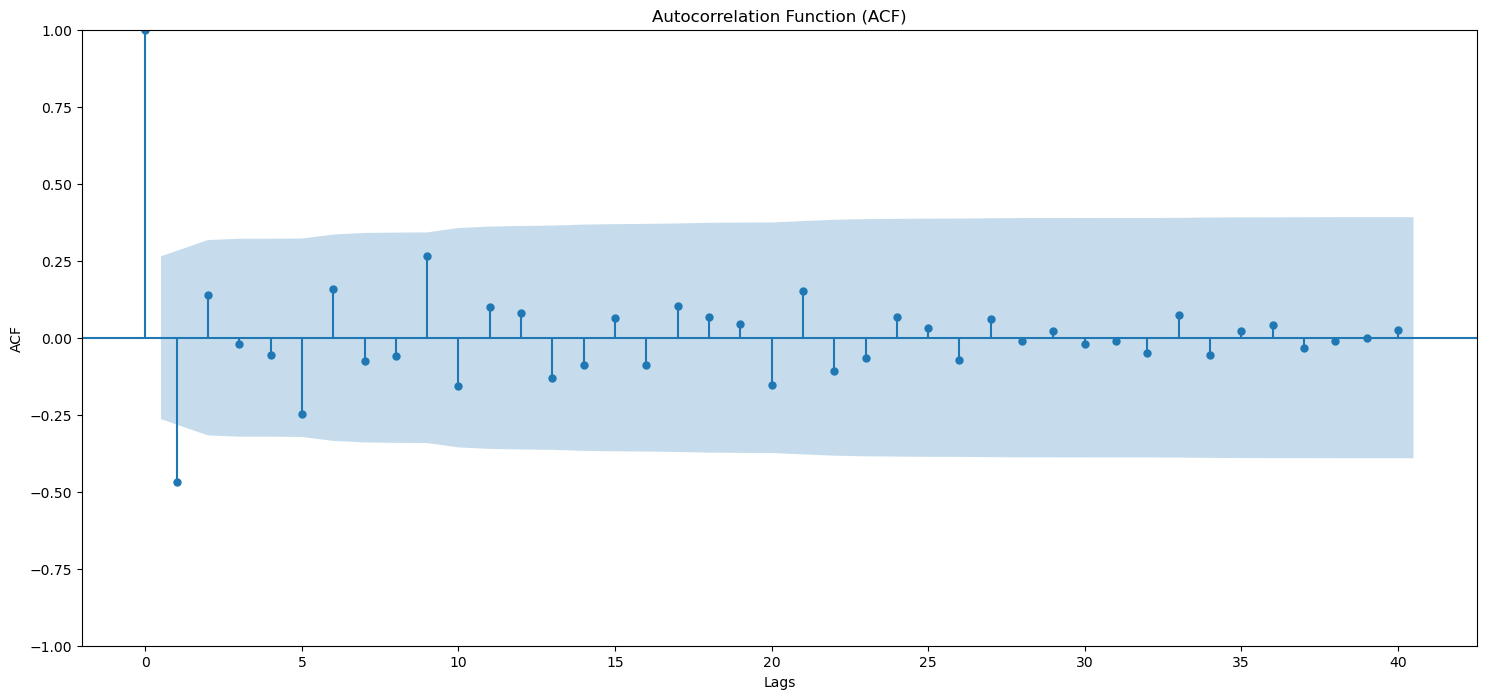

<Figure size 1200x600 with 0 Axes>

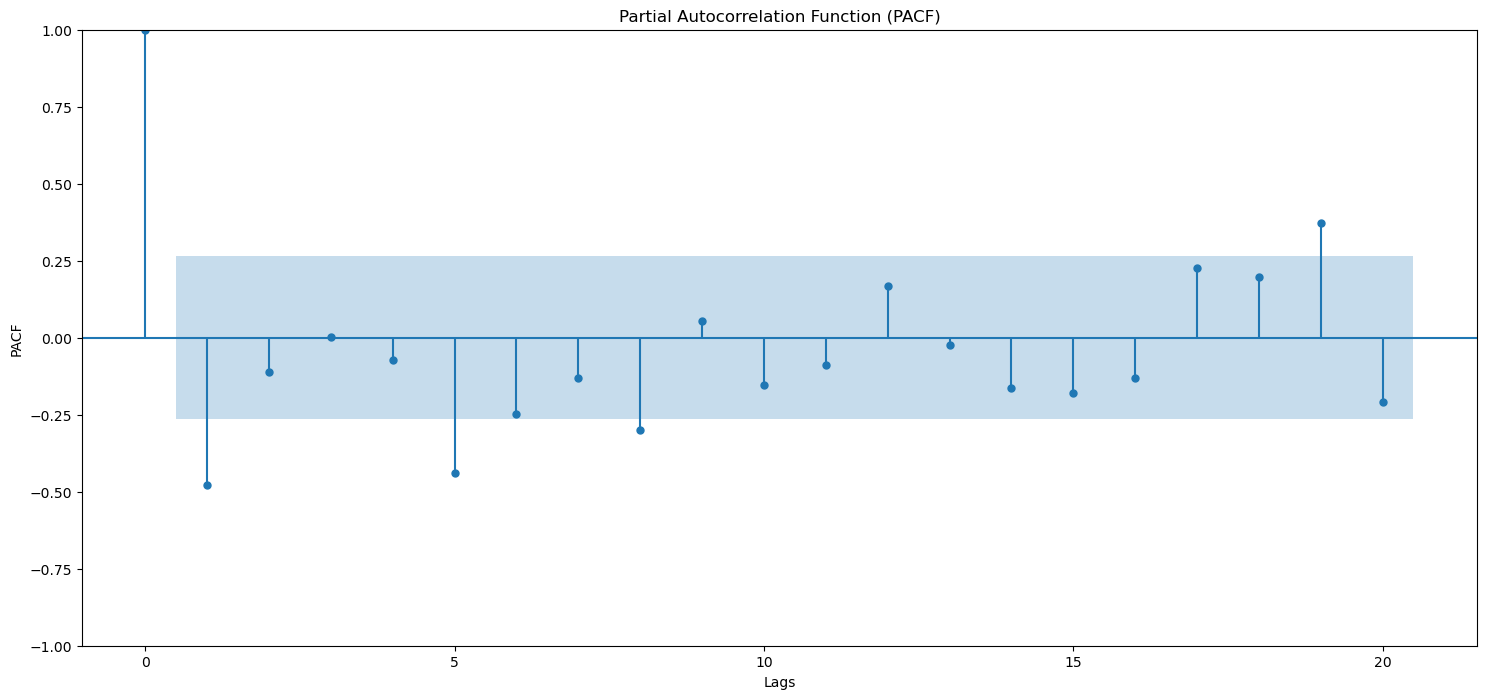

In [134]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(data_boxcox_diff['sales'], lags=40, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(data_boxcox_diff['sales'], lags=20, alpha=0.05)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

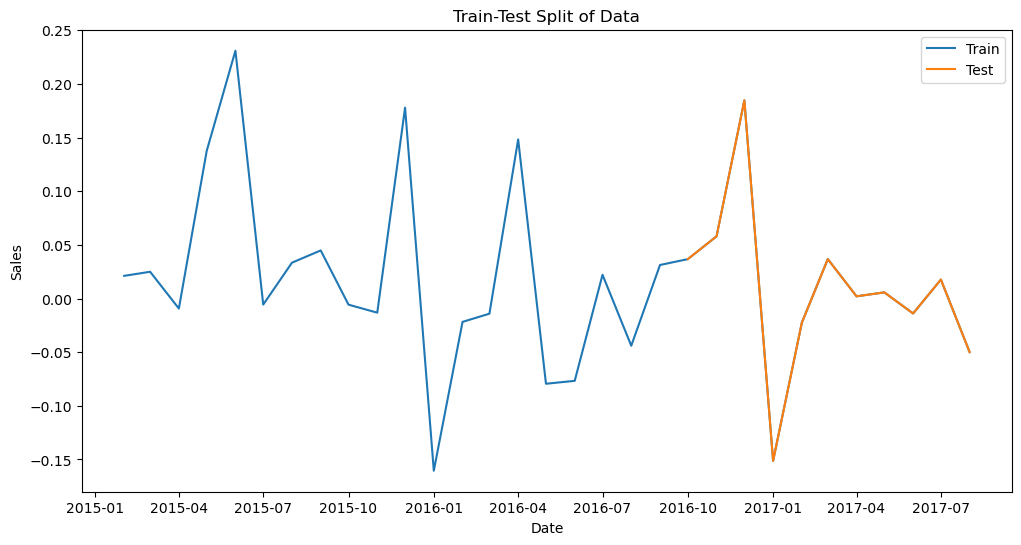

In [168]:
# Split the data into training and testing sets
# train_size = 0.8  # Proportion of data for training
# train_data, test_data = train_test_split(data_boxcox_diff, train_size=train_size, shuffle=False)
train_size=data_boxcox_diff.iloc[:-31]
train_data=data_boxcox_diff.iloc[-31:]

# Plotting the train and test splits
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['sales'], label='Train')
plt.plot(test_data.index, test_data['sales'], label='Test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Train-Test Split of Data')
plt.show()

In [169]:
# Split the data into training and testing sets
train_size = int(0.8 * len(data_boxcox_diff))
train_data, test_data = data_boxcox_diff[:train_size], data_boxcox_diff[train_size:]

# Define the ARIMA model with orders (p, d, q)
p, d, q = 0, 0, 1
model = ARIMA(train_data['sales'], order=(p, d, q))

# Fit the model
model_fit = model.fit()

# Summary of the fitted model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   44
Model:                 ARIMA(0, 0, 1)   Log Likelihood                  18.795
Date:                Wed, 30 Aug 2023   AIC                            -31.589
Time:                        20:53:58   BIC                            -26.237
Sample:                    02-01-2013   HQIC                           -29.604
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.009      2.122      0.034       0.001       0.036
ma.L1         -0.6551      0.113     -5.799      0.000      -0.876      -0.434
sigma2         0.0246      0.006      3.793      0.0

In [170]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Forecast on the test data
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)




# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['sales'], forecast)
print(f"Mean Squared Error (MSE): {mse:.2f}")




# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08


In [171]:
# Try different ARIMA orders and choose the best model based on performance
best_mse = float('inf')
best_order = None

for p in range(3):  # Change this range to explore different AR orders
    for q in range(3):  # Change this range to explore different MA orders
        model = ARIMA(train_data['sales'], order=(p, 0, q))  # Assuming d=0 for simplicity
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test_data))
        
        mse = mean_squared_error(test_data['sales'], forecast)
        if mse < best_mse:
            best_mse = mse
            best_order = (p, 0, q)

# Print the best order
print(f"Best ARIMA Order: {best_order}")

# Fit the best model
final_model = ARIMA(train_data['sales'], order=best_order)
final_model_fit = final_model.fit()

# Forecast on the test data using the best model
forecast = final_model_fit.forecast(steps=len(test_data))

# Calculate Mean Squared Error (MSE) using the best model
best_mse = mean_squared_error(test_data['sales'], forecast)
print(f"Best Model Mean Squared Error (MSE): {best_mse:.2f}")

Best ARIMA Order: (2, 0, 1)
Best Model Mean Squared Error (MSE): 0.01


In [188]:
trainee=data_boxcox_diff.iloc[:-31]
testeee=data_boxcox_diff.iloc[-31:]

In [190]:
##prediction
pred_start_date=trainee.index[0]
pred_end_date=testeee.index[-1]

In [198]:
print(data_boxcox_diff.shape)
print(testeee.shape)
print(trainee.shape)

(55, 1)
(31, 1)
(24, 1)


In [203]:

model_ARIMA=ARIMA(trainee['sales'],order=(2,0,1))

In [204]:
model_Arima_fit=model_ARIMA.fit()

In [205]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   24
Model:                 ARIMA(2, 0, 1)   Log Likelihood                   9.317
Date:                Wed, 30 Aug 2023   AIC                             -8.633
Time:                        21:55:38   BIC                             -2.743
Sample:                    02-01-2013   HQIC                            -7.071
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0283      0.004      7.346      0.000       0.021       0.036
ar.L1         -0.1404      0.316     -0.444      0.657      -0.760       0.480
ar.L2          0.1534      0.343      0.448      0.655      -0.518       0.825
ma.L1         -0.9965      8.695     -0.115      0.909     -18.038      16.045
sigma2         0.0236      0.204      0.116      0.908      -0.375       0.423
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.85   Prob(JB):                         0.77
Heteroskedasticity (H):              15.43   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [206]:
##prediction
pred_start_date=testeee.index[0]
pred_end_date=testeee.index[-1]
print(pred_start_date)
print(pred_end_date)

2015-02-01 00:00:00
2017-08-01 00:00:00


In [207]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=testeee['sales']-pred

<AxesSubplot:ylabel='Density'>

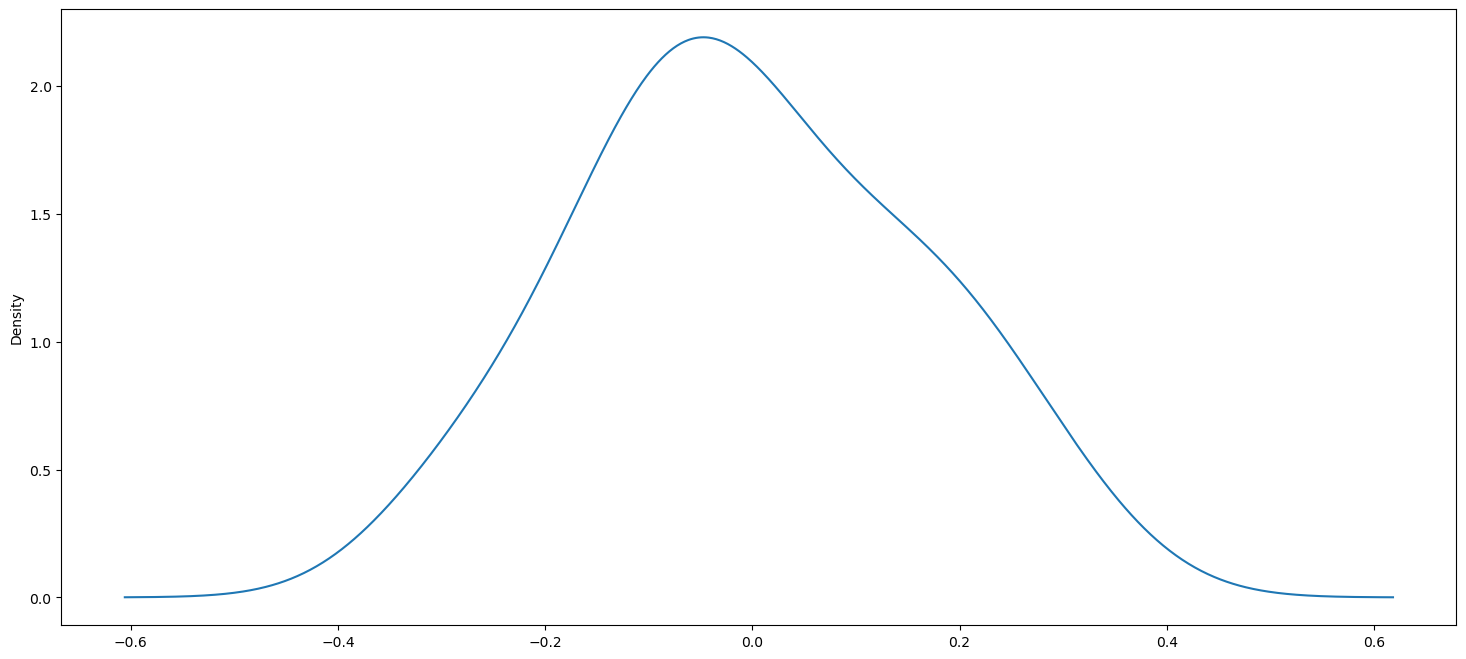

In [210]:
model_Arima_fit.resid.plot(kind='kde')

In [215]:
testeee['Predicted_ARIMA']=pred


C:\Users\Dell\AppData\Local\Temp\ipykernel_15008\2241452642.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# I am Facing PROBLEM in prediction Part of ARIMA

<AxesSubplot:xlabel='date'>

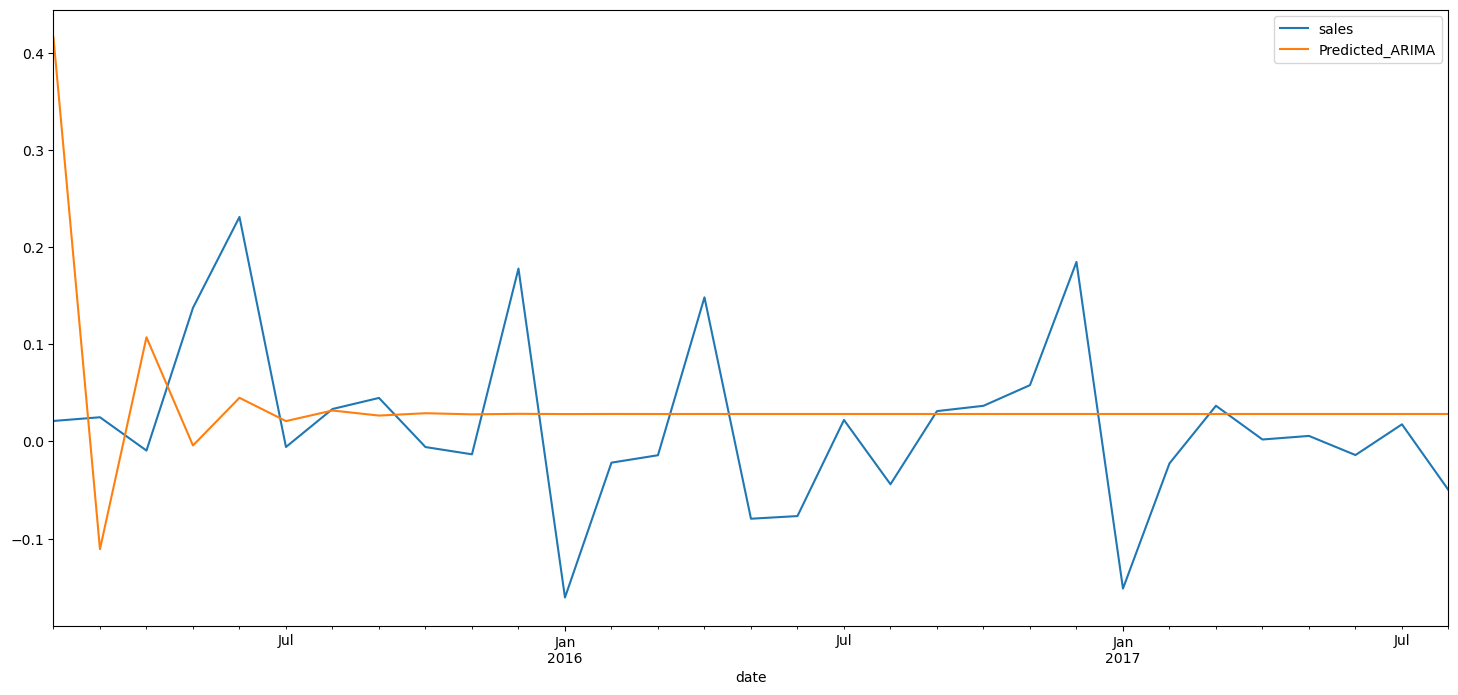

In [218]:
testeee[['sales','Predicted_ARIMA']].plot()

In [220]:
# # Model diagnostics
# residuals = pd.DataFrame(model_fit.resid, columns=['Residual'])
# residuals.plot()
# plt.show()

# residuals.plot(kind='kde')
# plt.show()

# print(residuals.describe())

In [ ]:
# index_future_dates=pd.date_range(start='2017-08-15',end='2018-08-14')
# predic_1yr=model_fu.predict(start=len(data_resampled), end=len(data_resampled)+365,typ='levels').rename('ARIMA PREDICTION')
# predic_1yr.index=index_future_dates
# print(predic_1yr)

In [ ]:
import pandas as pd

# Generate date range for future predictions
index_future_dates = pd.date_range(start='2018-08-15', end='2019-08-14')  # Adjust the range as needed

# Make predictions using the ARIMA model
# Replace 'model_fu' with your ARIMA model
predic_1yr = model_fu.predict(start=len(data_resampled), end=len(data_resampled)+365, typ='levels').rename('ARIMA PREDICTION')

# Set the index of the predictions to the generated date range
predic_1yr.index = index_future_dates

print(predic_1yr)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(predic_1yr.index, predic_1yr, label='ARIMA Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Predictions for 1 Year')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model_data' is your fitted ARIMA model and 'testing' is your testing data
start = len(training)
end = len(training) + len(testing) - 1

# Generate predictions using the ARIMA model
predic = model_data.predict(start=start, end=end, typ='levels')

# Set the index of 'predic' to match the index of 'testing'
predic.index = testing.index

# Plot predictions and testing data
plt.figure(figsize=(10, 6))
plt.plot(testing.index, predic, label='Predictions', color='red')
plt.plot(testing.index, testing['sales'], label='Actual Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Predictions vs Actual Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Make predictions
start_idx = len(train_np)
end_idx = len(train_np) + len(upsampled_test) - 1
predictions = result.predict(start=start_idx, end=end_idx)

# Print the predictions
print(predictions)

In [ ]:
actual_values =data_boxcox_diff['sales']
# Truncate or pad the predictions array to match the length of actual_values
predictions = predictions[:len(actual_values)]

# Make sure both arrays have the same length
actual_values = actual_values[:len(predictions)]

# Calculate evaluation metrics
mae = np.mean(np.abs(predictions - actual_values))
mse = np.mean((predictions - actual_values) ** 2)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
predictions

In [ ]:

# # Fit the final ARIMA model with the best order
# best_order = (2, 0, 1)  # Replace with your best order
# final_model = ARIMA(data_boxcox_diff['sales'], order=best_order)
# final_model_fit = final_model.fit()

# # Forecast the next 2 years (assuming frequency is 'D' for daily data)

# # forecast_steps = 365 * 2

# forecast_steps=pd.date_range(start='2017-08-15', periods=365)
# # forecast_index = pd.date_range(start=data_boxcox_diff.index[-1] + pd.DateOffset(days=1), periods=forecast_steps, freq='D')


# # forecast_index = pd.date_range(start=len(data_boxcox_diff['sales'], periods=forecast_steps, freq='D')


# forecast_index = model_fu.predict(start=len(data_boxcox_diff['sales']), 
#                               end=len(data_boxcox_diff['sales'])+364, typ='levels').rename('ARIMA PREDICTION')

# # Forecast the values
# forecast = model_fit.forecast(steps=forecast_steps)

# # Create a DataFrame for the forecast
# forecast_df = pd.DataFrame({'forecast': forecast}, index=forecast_index)

# # Inverse transform the forecasted values if needed (e.g., if you performed Box-Cox transformation)
# # forecast_df['forecast'] = your_inverse_transform_function(forecast_df['forecast'])

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.plot(data_boxcox_diff.index, data_boxcox_diff['sales'], label='Historical Data')
# plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast', color='red')
# plt.legend()
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.title('ARIMA Forecast for 2 Years')
# plt.show()
